### Disentangling a common gene core between *R. solanacearum* strains UW163, IBSBF1503 and UY031 during the infection process in different plant hosts.

**Authors:** \
Cristian David Grisales Vargas, BSc. biocdgv@gmail.com \
Bioprospecting and Microbiome Studies Group, PECET, Universidad de Antioquia, Colombia \
Margarita Valderrama Maya,BSc, MSc, <valdemargara@gmail.com> \
Escuela de Ciencias, Universidad EAFIT, Colombia.

### 1. Exploring Data with R

#### 1.1. Libraries:

In [1]:
pacman::p_load(RColorBrewer,ggplot2,limma,DESeq,DESeq2,edgeR,gplots,reshape2,
               plyr,DEFormats,gridExtra,grid,cluster,devtools,tikzDevice,
               viridis,pheatmap,IRdisplay,vsn,hexbin, dendextend,dplyr,ggrepel, UpSetR)

#### 1.2. Datasets UW163 & IBSBF1503:

In [6]:
#------------------------------------------------------------#
#---------Count Matrix of genes with FeatureCounts-----------#
#------------------------------------------------------------#
both_L<- read.table('Both.txt',sep='\t',header=T,row.names=1)
both<- both_L[,2:25] #Remove Length column and location column
both[1:6,1:4]        #View Data 

,Tomato_1_UW163,Tomato_2_UW163,Tomato_3_UW163,Banana_1_UW163
,<int>,<int>,<int>,<int>
UW163_00020,10,12,17,20
UW163_00025,2,2,4,6
UW163_00030,2,3,6,6
UW163_00040,1,0,0,2
UW163_00045,0,0,1,1
UW163_00050,0,2,1,4


In [7]:
#------------------------------------------------------------#
#-----------filtering rows with very small counts------------#
#------------------------------------------------------------#
both[, "max"]<- apply(both[ , ], 1, max) # Make a new column with maximum values from each condition.
both_F<-both[both[,ncol(both)]>32,]      # Remove rows with maximum values below threshold (<32)
both_F<- both_F[,-ncol(both_F)]          # Remove maximum values column
both_F[1:6,1:4]

,Tomato_1_UW163,Tomato_2_UW163,Tomato_3_UW163,Banana_1_UW163
,<int>,<int>,<int>,<int>
UW163_00020,10,12,17,20
UW163_00085,24,27,26,34
UW163_00095,14,5,6,26
UW163_00100,26,28,41,88
UW163_00105,71,84,88,257
UW163_00110,383,361,428,453


In [8]:
#------------------------------------------------------------#
#-----------------------Target File--------------------------#
#------------------------------------------------------------#
t_both <- read.table("Both_targets.txt", header=T)
t_both$condition<-factor(t_both$condition)
head(t_both)    #View Data

#---First, let's check if our target rownames match with our columns name---#:
rownames(t_both) <- sub("fb", "", rownames(t_both)) 
all(rownames(t_both) %in% colnames(both_F))

,condition
,<fct>
Tomato_1_UW163,tomato_UW163
Tomato_2_UW163,tomato_UW163
Tomato_3_UW163,tomato_UW163
Banana_1_UW163,banana_UW163
Banana_2_UW163,banana_UW163
Banana_3_UW163,banana_UW163


[1] TRUE

#### 1.3  Normalize gene counts from UW163 and IBSBF1503 datasets:

In [9]:
#------------------------------------------------------------#
#------------------Normalize once for all--------------------#
#------------------------------------------------------------#
cds <-newCountDataSet(both_F, t_both$condition)
cds <-estimateSizeFactors(cds) 
norm <-(counts(cds, normalized=TRUE)) # Object to put normalized counts
n_genes<-nrow(norm)
head(norm)
cat("Number of normalized genes: ", n_genes) 

,Tomato_1_UW163,Tomato_2_UW163,Tomato_3_UW163,Banana_1_UW163,Banana_2_UW163,Banana_3_UW163,Control_1_UW163,Control_2_UW163,Control_3_UW163,Minimal_1_UW163,⋯,Minimal_3_IBSBF1503,Control_1_IBSBF1503,Control_2_IBSBF1503,Control_3_IBSBF1503,Tomato_1_IBSBF1503,Tomato_2_IBSBF1503,Tomato_3_IBSBF1503,Melon_1_IBSBF1503,Melon_2_IBSBF1503,Melon_3_IBSBF1503
UW163_00020,11.43871,12.230506,16.182543,12.09538,9.361251,11.19660,13.323220,7.02080,10.053454,9.750107,⋯,14.05895,13.65324,14.690459,11.648070,28.56400,31.87934,23.98313,37.62543,40.29370,35.68028
UW163_00085,27.45290,27.518639,24.749771,20.56214,28.083753,21.77116,24.425904,35.80608,38.873355,50.250551,⋯,24.10106,29.40697,34.627511,24.266812,51.93454,50.77081,47.96625,37.62543,34.24964,42.43060
UW163_00095,16.01419,5.096044,5.711486,15.72399,15.969193,16.17286,9.622326,8.42496,8.042763,23.250255,⋯,16.06737,11.55274,6.295911,5.824035,15.58036,11.80716,12.91399,27.17392,26.19090,13.50065
UW163_00100,29.74064,28.537847,39.028486,53.21967,45.154270,43.54232,19.984830,29.48736,34.851974,51.750567,⋯,58.24422,46.21095,49.317970,42.709589,46.74108,53.13224,53.50082,64.79936,84.61677,60.75291
UW163_00105,81.21483,85.613542,83.768457,155.42562,122.246926,123.78459,46.631270,49.84768,41.554276,106.501168,⋯,108.45475,69.31643,70.304340,92.213885,153.20689,112.16806,166.03703,165.13384,183.33633,131.14914
UW163_00110,438.10251,367.934389,407.419314,273.96034,209.251496,227.04209,85.860752,106.01408,156.163651,201.752212,⋯,300.25899,173.29108,153.200502,160.160957,625.81118,715.51416,774.83947,733.69593,606.42018,421.41304


Number of normalized genes:  4638

####  1.4. Dataset from UY031 strain:

In [20]:
#------------------------------------------------------------#
#---------Count Matrix of genes with FeatureCounts-----------#
#------------------------------------------------------------#
UY031_L<- read.table('UY031.txt',sep='\t',header=T,row.names=1)
UY031 <- UY031_L[,2:7] # Remove Length column and location column
head(UY031)

,Potato_1_UY031,Potato_2_UY031,Potato_3_UY031,Control_1_UY031,Control_2_UY031,Control_3_UY031
,<int>,<int>,<int>,<int>,<int>,<int>
UW163_00020,0,0,0,89,98,16
UW163_00025,0,0,0,1,4,3
UW163_00030,2,1,0,41,54,10
UW163_00040,0,0,2,51,52,4
UW163_00045,1,0,0,80,109,10
UW163_00050,1,2,0,33,32,9


In [21]:
#-----------------------------------------------------------------------------#
#-----------filtering rows with very small counts-----------------------------#
#-----------------------------------------------------------------------------#
UY031[, "max"]<- apply(UY031[ , ], 1, max)       # Make a new column with maximum values from each condition.
UY031_F<-UY031[UY031[,ncol(UY031)]>32,] # Remove rows with maximum values below threshold (<32)
UY031_F<- UY031_F[,-ncol(UY031_F)]        # Remove maximum values column

In [22]:
#------------------------------------------------------------#
#-----------------------Target File--------------------------#
#------------------------------------------------------------#
t_UY031<- read.table ("UY031_targets.txt", header=T)
t_UY031$condition<-factor(t_UY031$condition)
head(t_UY031)
#---But first, let's check if our target rownames match with our columns name---#:
rownames(t_UY031) <- sub("fb", "", rownames(t_UY031)) 
all(rownames(t_UY031) %in% colnames(UY031_F))

,condition
,<fct>
Potato_1_UY031,potato_UY031
Potato_2_UY031,potato_UY031
Potato_3_UY031,potato_UY031
Control_1_UY031,control_UY031
Control_2_UY031,control_UY031
Control_3_UY031,control_UY031


[1] TRUE

#### 1.5  Normalize gene counts from UY031 datasets:

In [23]:
#-----------------------------------------------------------------------------#
#------------------Normalize once for all-------------------------------------#
#-----------------------------------------------------------------------------#
cds_UY <-newCountDataSet(UY031_F, t_UY031$condition)
cds_UY <-estimateSizeFactors(cds_UY) 
norm_UY <-(counts(cds_UY, normalized=TRUE)) # Object where to put normalized counts
head(norm_UY)

,Potato_1_UY031,Potato_2_UY031,Potato_3_UY031,Control_1_UY031,Control_2_UY031,Control_3_UY031
UW163_00020,0.00000,0.000000,0.00000,7.692714,7.942131,1.4772913
UW163_00030,64.59057,3.943347,0.00000,3.543835,4.376276,0.9233070
UW163_00040,0.00000,0.000000,22.19577,4.408185,4.214192,0.3693228
UW163_00045,32.29529,0.000000,0.00000,6.914799,8.833595,0.9233070
UW163_00050,32.29529,7.886694,0.00000,2.852355,2.593349,0.8309763
UW163_00055,32.29529,7.886694,0.00000,4.148880,5.753993,0.2769921


### 2. Differential expression analysis:

#### Strains UW163 & IBSBF1503

In [14]:
#----------------Creating DESeq2 object----------------------#
#------------------------------------------------------------#
dds_both <- DESeqDataSetFromMatrix(countData = both_F,
                                   colData = t_both,
                                   design = ~ condition)
#------------------------------------------------------------#
#------------------Normalize for real------------------------#
#------------------------------------------------------------#
suppressMessages(dds_both<-DESeq(dds_both))
# resultsNames(dds_both)
# slotNames(dds_both)

In [15]:
#------------------------------------------------------------#
#--------Making contrasts to get desired comparisons---------#
#------------------------------------------------------------#

#------------------DEGs Banana UW163-------------------------#
res_bUW163 <- results(dds_both, contrast=c("condition","banana_UW163","control_UW163"))
ups_bUW163<-subset(res_bUW163,padj < 0.05 & log2FoldChange> 0.5894)
downs_bUW163<-subset(res_bUW163,padj < 0.05 & log2FoldChange< -0.5894)
#write.csv(as.data.frame(ups_bUW163), file="ups_bUW163.csv")
#write.csv(as.data.frame(downs_bUW163), file="downs_bUW163.csv")

#--------------------DEGs Tomate UW163------------------------#
res_tUW163 <- results(dds_both, contrast =c("condition","tomato_UW163","control_UW163"))
ups_tUW163<-subset(res_tUW163,padj < 0.05 & log2FoldChange>0.5894)
downs_tUW163<-subset(res_tUW163,padj < 0.05 & log2FoldChange< -0.5894)
#write.csv(as.data.frame(ups_tUW163), file="ups_tUW163.csv")
#write.csv(as.data.frame(downs_tUW163), file="downs_tUW163.csv")

#--------------------DEGs Minimal UW163------------------------#
res_mUW163 <- results(dds_both, contrast=c("condition","minimal_UW163","control_UW163"))
ups_mUW163<-subset(res_mUW163,padj < 0.05 & log2FoldChange>0.5894)
downs_mUW163<-subset(res_mUW163,padj < 0.05 & log2FoldChange< -0.5894)
#write.csv(as.data.frame(ups_mUW163), file="ups_mUW163.csv")
#write.csv(as.data.frame(downs_mUW163), file="downs_mUW163.csv")

#-------------------DEGs Melon IBSBF1503------------------------#
res_meIBSB <- results(dds_both, contrast=c("condition","melon_IBSBF1503","control_IBSBF1503"))
ups_meIBSB<-subset(res_meIBSB,padj < 0.05 & log2FoldChange>0.5894)
downs_meIBSB<-subset(res_meIBSB,padj < 0.05 & log2FoldChange< -0.5894)
#write.csv(as.data.frame(ups_meIBSB), file="ups_meIBSB.csv")
#write.csv(as.data.frame(downs_meIBSB), file="downs_meIBSB.csv")

#--------------------DEGs Tomate IBSBF1503----------------------#
res_tIBSB <- results(dds_both, contrast=c("condition","tomato_IBSBF1503","control_IBSBF1503"))
ups_tIBSB<-subset(res_tIBSB,padj < 0.05 & log2FoldChange>0.5894)
downs_tIBSB<-subset(res_tIBSB,padj < 0.05 & log2FoldChange< -0.5894)
#write.csv(as.data.frame(ups_tIBSB), file="ups_tIBSB.csv")
#write.csv(as.data.frame(downs_tIBSB), file="downs_tIBSB.csv")

#---------------------DEGs Minimal IBSBF1503--------------------#
res_mIBSB <- results(dds_both, contrast=c("condition","minimal_IBSBF1503","control_IBSBF1503"))
ups_mIBSB<-subset(res_mIBSB,padj < 0.05 & log2FoldChange>0.5894)
downs_mIBSB<-subset(res_mIBSB,padj < 0.05 & log2FoldChange< -0.5894)
#write.csv(as.data.frame(ups_mIBSB), file="ups_mIBSB.csv")
#write.csv(as.data.frame(downs_mIBSB), file="downs_mIBSB.csv")

#### Strain UY031

In [24]:
#-----------------Creating DESeq2 object-------------------------------------#:
dds_UY031 <- DESeqDataSetFromMatrix(countData = UY031_F,
                                    colData   = t_UY031,
                                    design    = ~ condition)
#---------------------Normalize for real------------Strains UW163 & IBSBF1503------------------------#:
suppressMessages(dds_UY031<-DESeq(dds_UY031))
# resultsNames(dds_UY031)

#----------------------------Making contrasts to get desired comparisons-------------#:
res_UY031 <- results(dds_UY031, contrast=c("condition","potato_UY031","control_UY031"))
ups_UY031<-subset(res_UY031,padj < 0.05 & log2FoldChange > 0.5894)
downs_UY031<-subset(res_UY031,padj < 0.05 & log2FoldChange < -0.5894)

#write.csv(as.data.frame(ups_UY031), file="ups_UY031.csv")
#write.csv(as.data.frame(downs_UY031), file="downs_UY031.csv")

## 3. Quality Plotting

### 3.1 Boxplot

#### Strains UW163 & IBSBF1503

In [25]:
#------------------------------------------------------------#
#------------------------Normalized Data---------------------#
#------------------------------------------------------------#
options(warn = -1)
suppressWarnings(melted_Rals2 <- melt(norm))
melted_Rals2$title<- ('Strains UW163 and IBSBF1503')

In [17]:
#------------------------------------------------------------#
#-------------------------Theme ggplot-----------------------#
#------------------------------------------------------------#
My_Theme = theme(
  axis.title.x = element_text(size=20, vjust=0.001,face="bold"),
  axis.text.x = element_text(size = 11,angle = 90, color = "black", vjust=0.5),
  axis.title.y =element_text(size=20, vjust=1,face="bold"),
  axis.text.y = element_text(size = 17,color = "black" ),
  legend.title = element_blank(),
  legend.position = "none",
  strip.text.x= element_text(size = 22),
  panel.background = element_rect(fill = "grey97"))

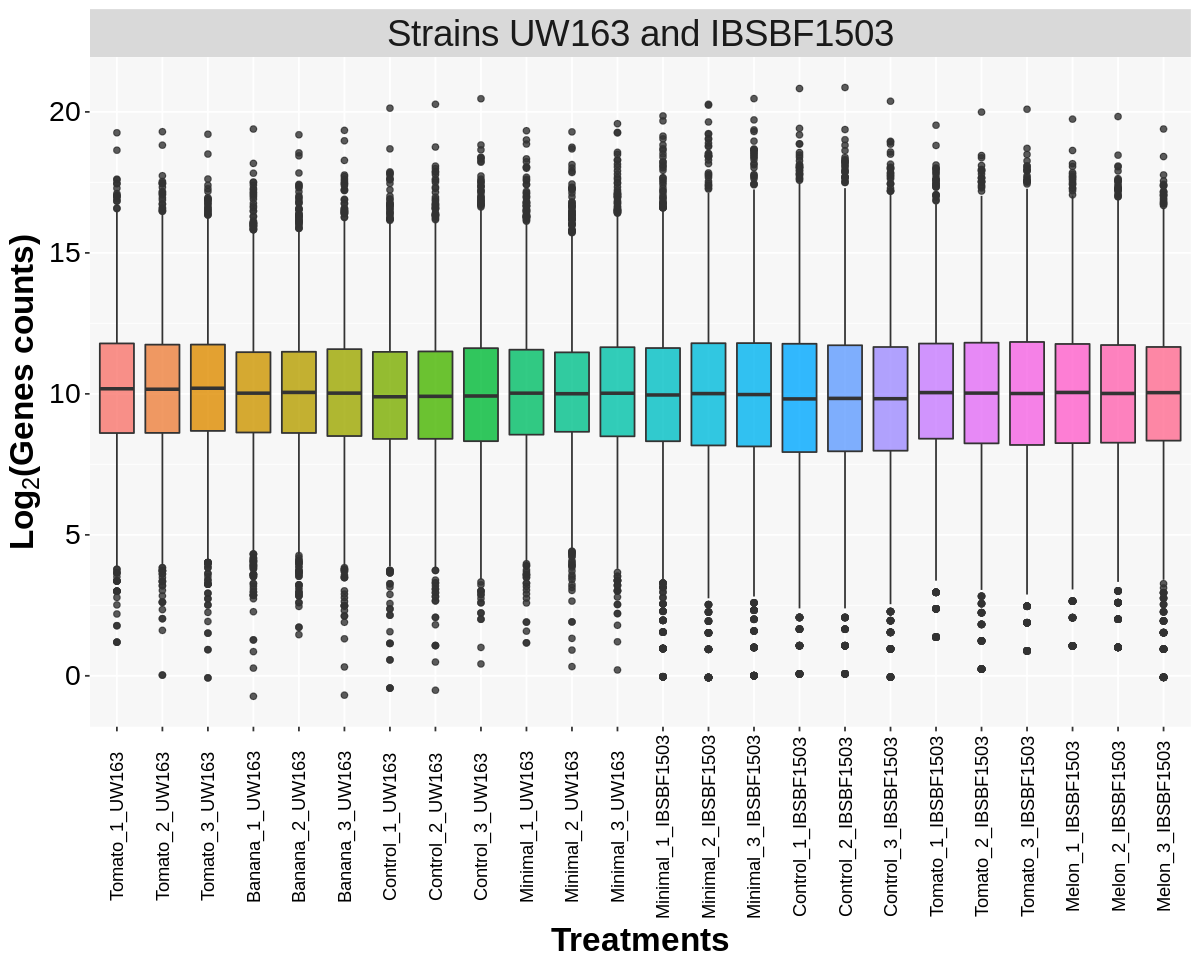

In [18]:
#------------------------------------------------------------#
#-------------------Boxplot on normalized data---------------#
#------------------------------------------------------------#
options(repr.plot.width = 10)
options(repr.plot.height = 8)
#tiff(file="boxplot_UW_IBSB.tiff", width=15, height=15, units="in", res=300)
#jpeg("boxplot_UW_IB.jpg", width = 15, height = 15,units="in",res=300)
boxplot_data2 <- ggplot(melted_Rals2, aes(Var2, log2(value), fill=Var2)) + geom_boxplot(alpha=0.8) +
                 My_Theme + ylab(expression(bold(paste(Log[2],"(Genes counts)"))))+ xlab("Treatments") + 
                 facet_grid(. ~ title)
boxplot_data2
#dev.off()

#### Strain UY031

In [27]:
#------------------------------------------------------------#
#------------------------Normalized Data---------------------#
#------------------------------------------------------------#
options(warn = -1)
suppressWarnings(melted_UY301 <- melt(counts(dds_UY031,normalized=TRUE)))
melted_UY301$title <- " Strain UY031"

In [28]:
#------------------------------------------------------------#
#-------------------------Theme ggplot-----------------------#
#------------------------------------------------------------#
My_Theme = theme(
  axis.title.x = element_text(size=20, vjust=0.001,face="bold"),
  axis.text.x = element_text(size = 11,angle = 25, color = "black", vjust=0.5),
  axis.title.y =element_text(size=20, vjust=1,face="bold"),
  axis.text.y = element_text(size = 17,color = "black" ),
  legend.title = element_blank(),
  legend.position = "none",
  strip.text.x= element_text(size = 22),
  panel.background = element_rect(fill = "grey97"))

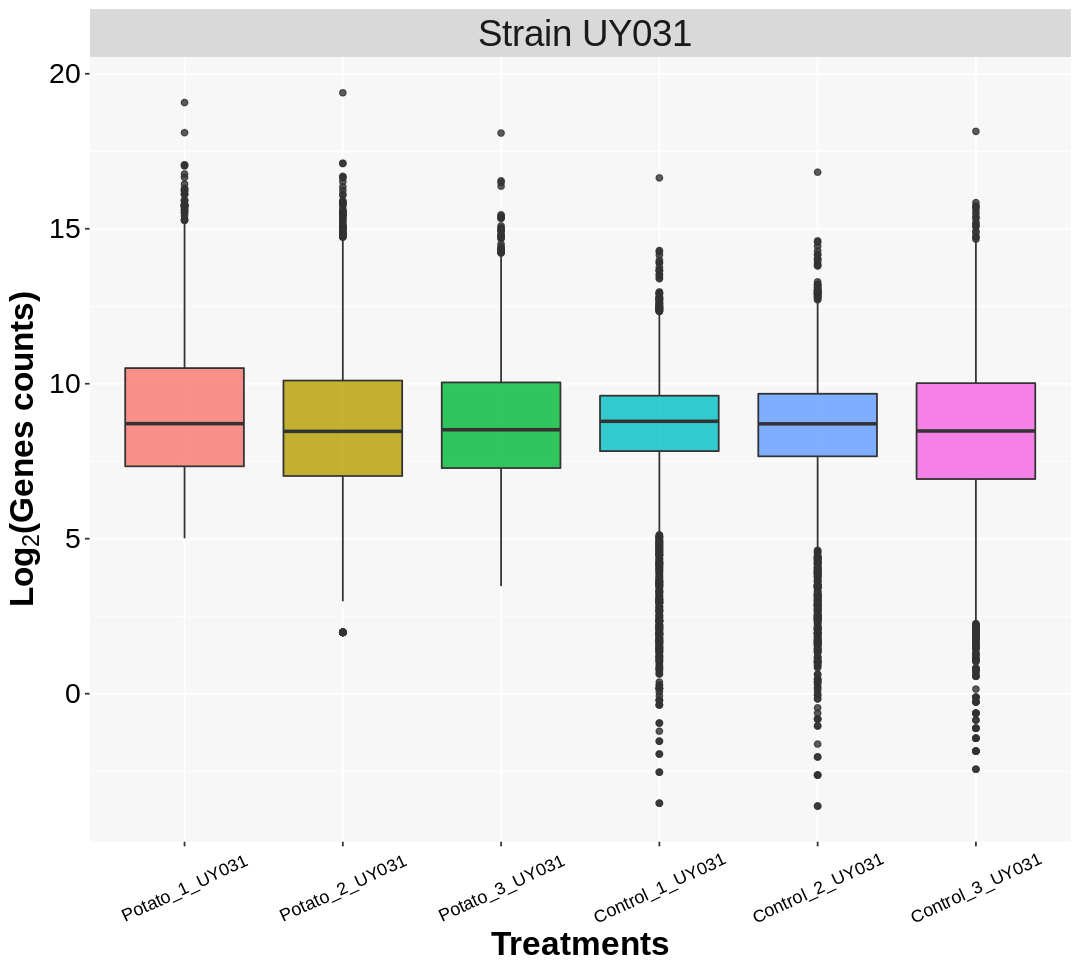

In [29]:
#------------------------------------------------------------#
#-------------------Boxplot on Normalized Data---------------#
#------------------------------------------------------------#
options(repr.plot.width = 9)
options(repr.plot.height = 8)

#tiff(file="boxplot_UY.tiff", width=15, height=15, units="in", res=300)
#jpeg("boxplot_UW_UY.jpg", width = 15, height = 15,units="in",res=300)
boxplot_UY301 <- ggplot(melted_UY301, aes(Var2, log2(value), fill=Var2)) + geom_boxplot(alpha=0.8) +
                 My_Theme + ylab(expression(bold(paste(Log[2],"(Genes counts)"))))+ xlab("Treatments") + 
                 facet_grid(. ~ title)
boxplot_UY301
#dev.off()

### 3.2 PCA Plot

#### Strains UW163 & IBSBF1503

In [30]:
#------------------------------------------------------------#
#-------------------------------Data-------------------------#
#------------------------------------------------------------#
vsd <- vst(dds_both, blind=FALSE)   #
pcaData <- DESeq2::plotPCA(vsd, intgroup=c("condition"),returnData = TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
pcaData <- as.data.frame(pcaData)

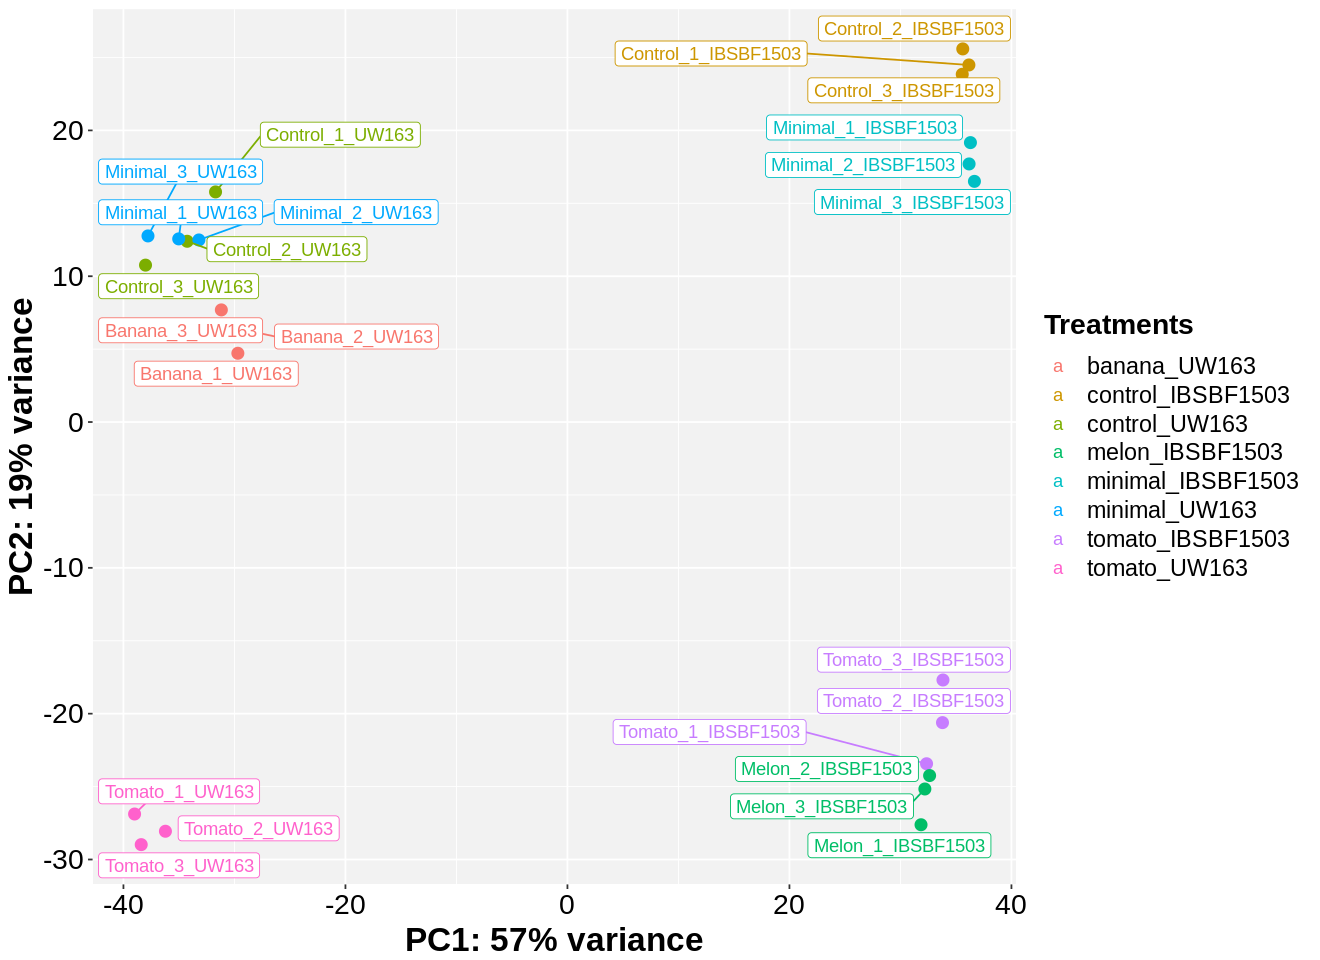

In [31]:
#------------------------------------------------------------#
#------------------Theme of the ggplot-----------------------#
#------------------------------------------------------------#

My_Theme = theme(
  axis.title.x = element_text(size=20, vjust=0.001, face="bold"),
  axis.text.x = element_text(size = 17, color = "black", vjust=0.5),
  axis.title.y =element_text(size=20, vjust=1, face="bold"),
  axis.text.y = element_text(size = 17,color = "black" ),
  strip.text.x= element_text(size = 22),
  panel.background = element_rect(fill = "grey95"),
  legend.title = element_text(size=17,face="bold"),
  legend.text = element_text(size = 14))

#------------------------------------------------------------#
#--------------------------PCA Plot--------------------------#
#------------------------------------------------------------#
options(repr.plot.width = 11) 
options(repr.plot.height = 8)

#tiff(file="PCA_UW_IB.tiff", width=15, height=15, units="in", res=300)
#jpeg("PCA_UW_IB.jpg", width = 15, height = 15,units="in",res=300)
PCA <- ggplot(pcaData, aes(PC1, PC2, color=condition, label=name)) +
       geom_point(size=3) + xlab(paste0("PC1: ",percentVar[1],"% variance")) +
       ylab(paste0("PC2: ",percentVar[2],"% variance")) + geom_label_repel(aes(point.padding = 2,label=name)) +
       guides(color=guide_legend("Treatments")) + My_Theme 
PCA
#dev.off()

In [32]:
#------------------------------------------------------------#
#-------------------------------Data-------------------------#
#------------------------------------------------------------#
Ral_norm_z  <-t(scale(t(counts(dds_UY031,normalized=T))))
Ral_norm_z2 <-na.omit(Ral_norm_z) #Remove those rows with NAs values on it.
pca_norm    <-prcomp(t(Ral_norm_z2))

pca.data.norm <-data.frame(sample=rownames(pca_norm$x),
                          X=pca_norm$x[,1],
                          Y=pca_norm$x[,2])



In [33]:
#--------------Variation percentage for each PC--------------#
pca.var.norm     <- pca_norm$sdev^2
pca.var.per.norm <- round(pca.var.norm/sum(pca.var.norm)*100, 1)
pca.data.norm$condition <- c("Potato_UY031","Potato_UY031","Potato_UY031","Control_UY031", "Control_UY031","Control_UY031")


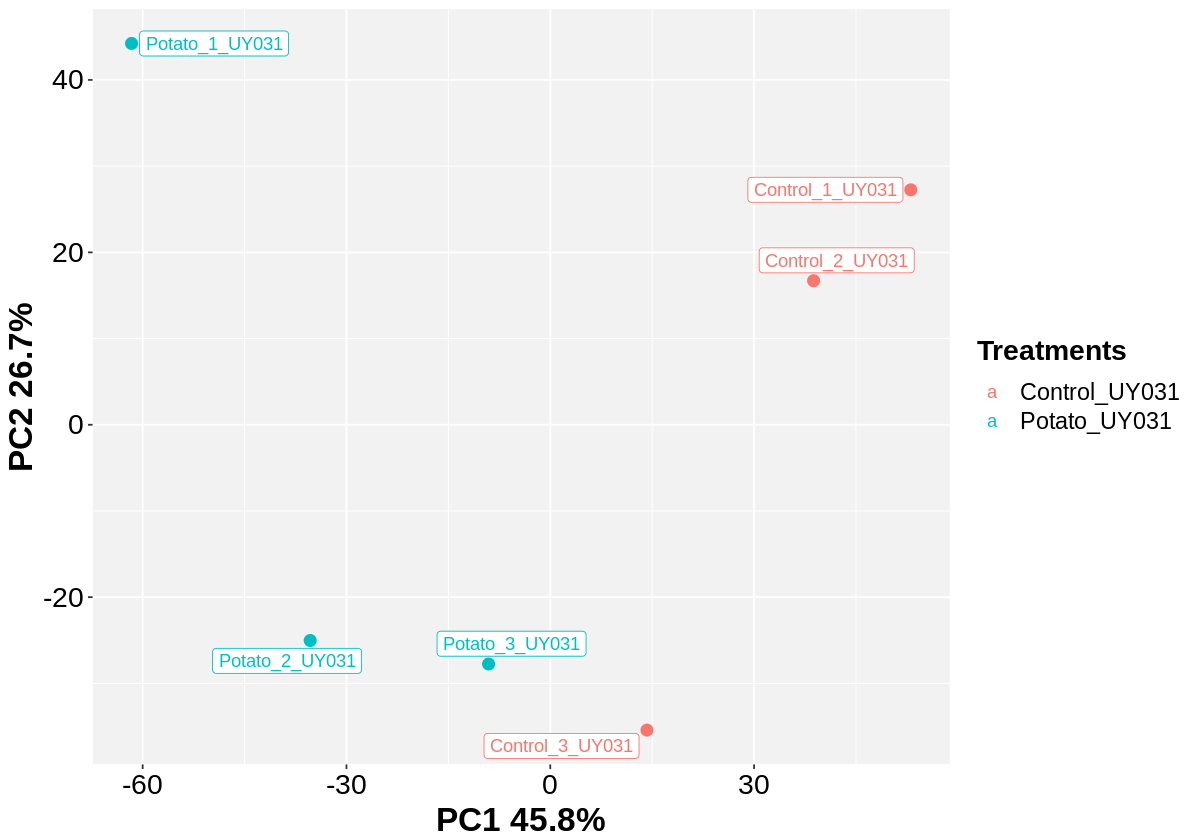

In [34]:
#------------------------------------------------------------#
#---------------Plot PCA Normalized Data---------------------#

options(repr.plot.width = 10) 
options(repr.plot.height = 7)
xlimit <- 36
ylimit <- 24
#tiff(file="PCA_UY.tiff", width=15, height=15, units="in", res=300)
#jpeg("PCA_UY.jpg", width = 15, height = 15,units="in",res=300)
pca_norm <- ggplot(data=pca.data.norm,aes(x=X,y=Y, col=condition,label=sample)) +
            geom_point(size=3)+ xlab(paste("PC1 ",pca.var.per.norm[1],"%",sep="")) +
            ylab(paste("PC2 ",pca.var.per.norm[2],"%",sep="")) + My_Theme +
            guides(color=guide_legend("Treatments")) + geom_label_repel(aes(point.padding = 2,label=sample))+ theme(legend.title = element_text(size=17, face="bold"))

pca_norm
#dev.off()

### 3.3 Pearson Correlation Heatmap

#### Strains UW163 & IBSBF1503

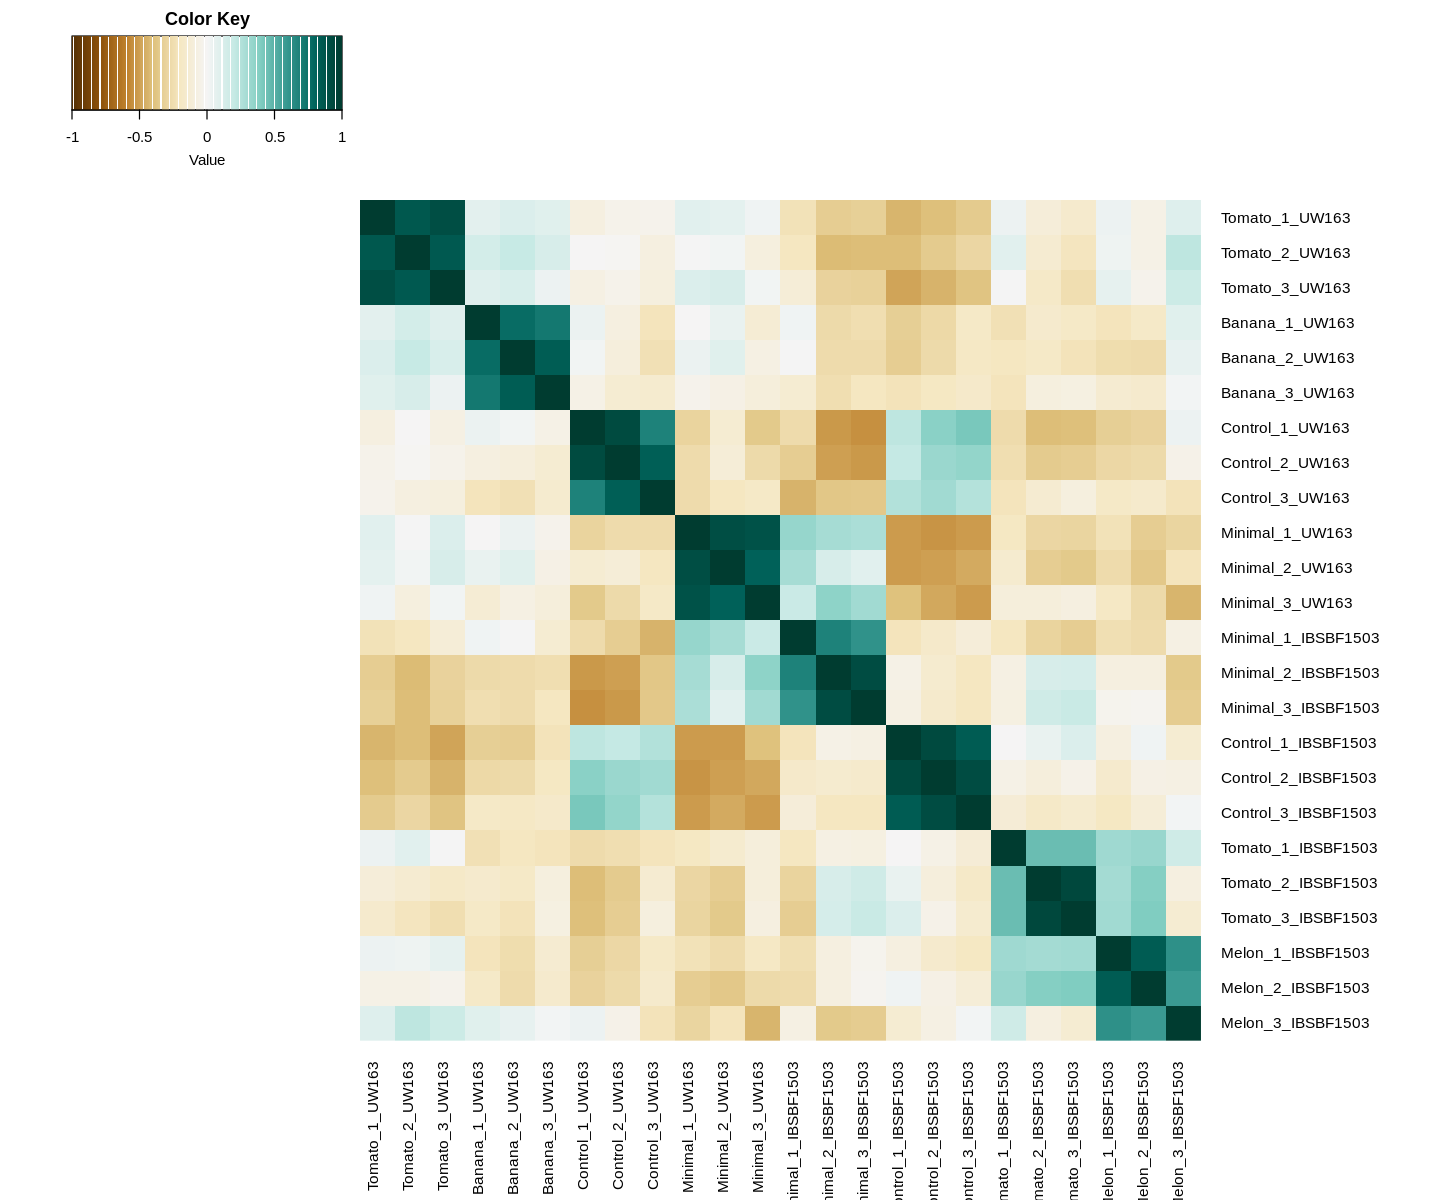

In [35]:
#------------------------------------------------------------#
#------------------------Data heatmap------------------------#
#------------------------------------------------------------#
options(repr.plot.width = 12) 
options(repr.plot.height = 10) 
options(warn = -1)

#tiff(file="Heat_UW_IBSB.tiff", width=15, height=15, units="in", res=300)
#jpeg("Heat_UW_IBSB.jpg", width = 15, height = 15,units="in",res=300)
strains<-t(scale(t(norm)))
corre<-cor(strains,method="pearson")
colors <-colorRampPalette((brewer.pal(12,'BrBG')))(300) # Color Palette
heat <-   heatmap.2(corre,trace='none',col=colors, scale='none', Colv=FALSE, Rowv=FALSE,
         dendrogram = "row",  key=TRUE,  margins=c(8,12),lwid = c(5,15), lhei = c(3,15), density.info = "none")

#dev.off()

#### Strain UY301

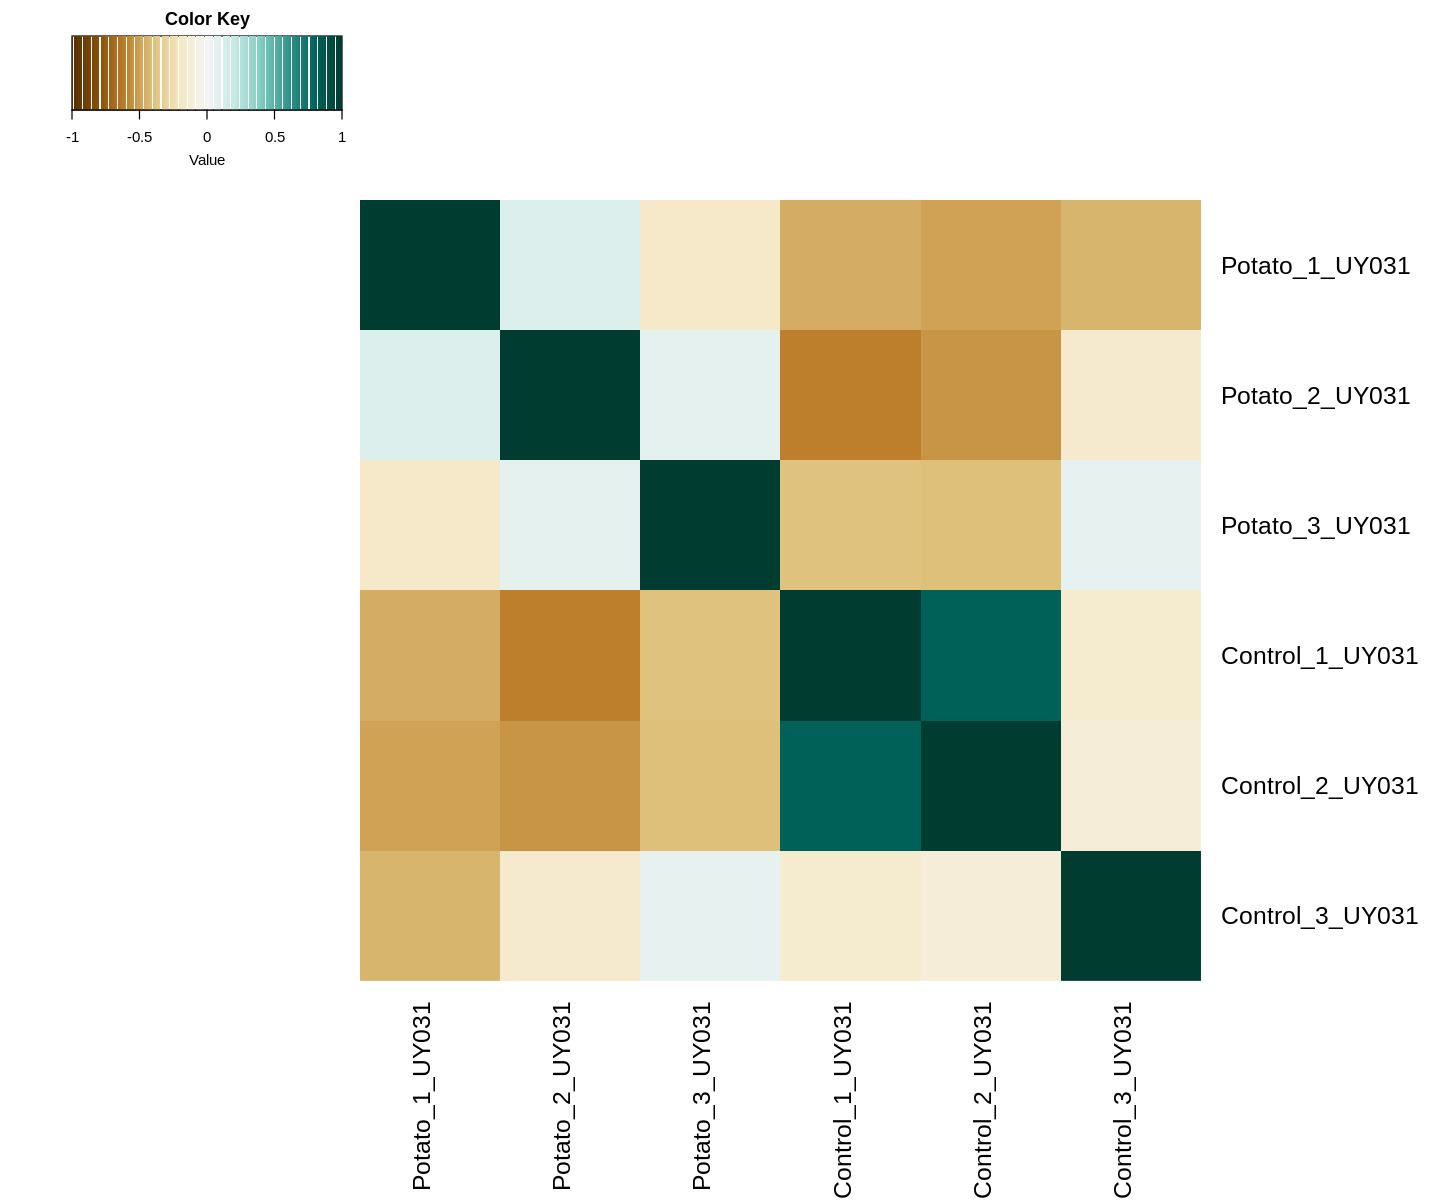

In [36]:
#------------------------------------------------------------#
#------------------------Data heatmap------------------------#
#------------------------------------------------------------#
options(repr.plot.width = 12) 
options(repr.plot.height = 10) 
options(warn = -1)
UY_z<-t(scale(t(norm_UY)))
corre<-cor(UY_z,method="pearson")
colors <-colorRampPalette((brewer.pal(12,'BrBG')))(300) # Color Palette
#tiff(file="heat_UY.tiff", width=15, height=15, units="in", res=300)
#jpeg("heat_UY.jpg", width = 15, height = 15,units="in",res=300)
heat <-   heatmap.2(corre,trace='none',col=colors, scale='none', Colv=FALSE, Rowv=FALSE,
         dendrogram = "row",  key=TRUE,  margins=c(11,12),lwid = c(5,15), lhei = c(3,15), density.info = "none")
#dev.off()

### 3.4 Hierarchical Clustering

#### Strains UW163 & IBSBF1503

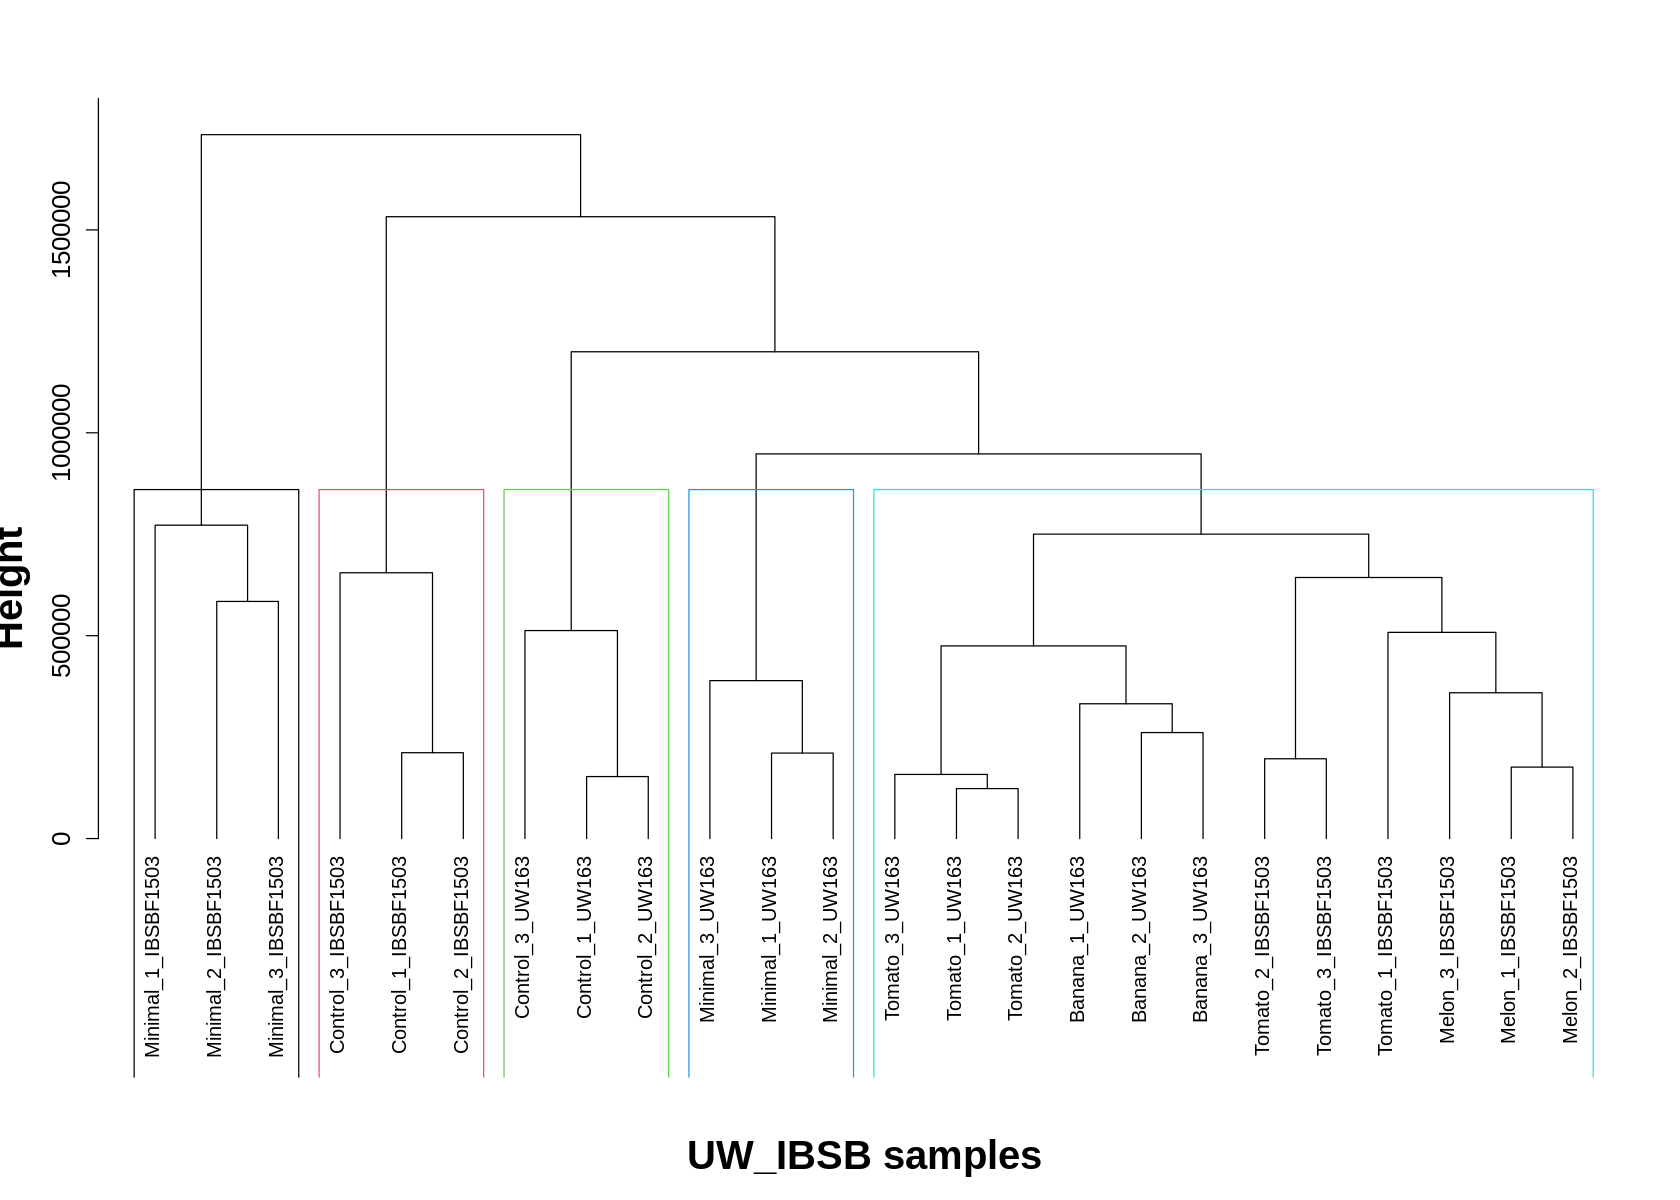

In [27]:
#supressWarnings()
#------------------------------------------------------------#
#-----------------Hierarchical clustering--------------------#
#------------------------------------------------------------#
options(repr.plot.width = 14) 
options(repr.plot.height = 10) 

clusters <- hclust(dist(t(counts(dds_both,normalized=T)), method='euclidian'),method='average')
clus2 <- cutree(clusters,5)
plot(clusters,hang=-1, main="", sub = "",cex.main=2, ylab = "Height", cex.lab=2, xlab="UW_IBSB samples", cex.axis=1.3
    ,font.lab=2, font.sub=2)
rect.hclust(clusters,k=5,border=1:2:3:4:5)
Dendogram <- as.dendrogram(clusters)
Dendogram <- color_branches(clusters,k=5)
labels_cex(Dendogram) <- 0.55

#tiff(file="Hclust_UW_IBSB.tiff", width=15, height=15, units="in", res=300)
# jpeg("Hclust_UW_IB.jpg", width = 17, height = 15,units="in",res=300)
#dev.off()

In [136]:
options(repr.plot.width = 14) 
options(repr.plot.height = 10) 

#tiff(file="dendo_UW_IBSB.tiff", width=25, height=10, units="in", res=300)
# jpeg("Hclust_UW_IB.jpg", width = 17, height = 15,units="in",res=300)
clusters <- hclust(dist(t(counts(dds_both,normalized=T)), method='euclidian'),method='average')
dend <- as.dendrogram(clusters,hang=-1)
dend <- color_branches(clusters,k=5)
labels_cex(dend) <- 1
#plot(dend, type = "triangle", ylab = "Height",font.lab=2,cex.axis=1,cex.lab=1.5, las=3)

#dev.off()

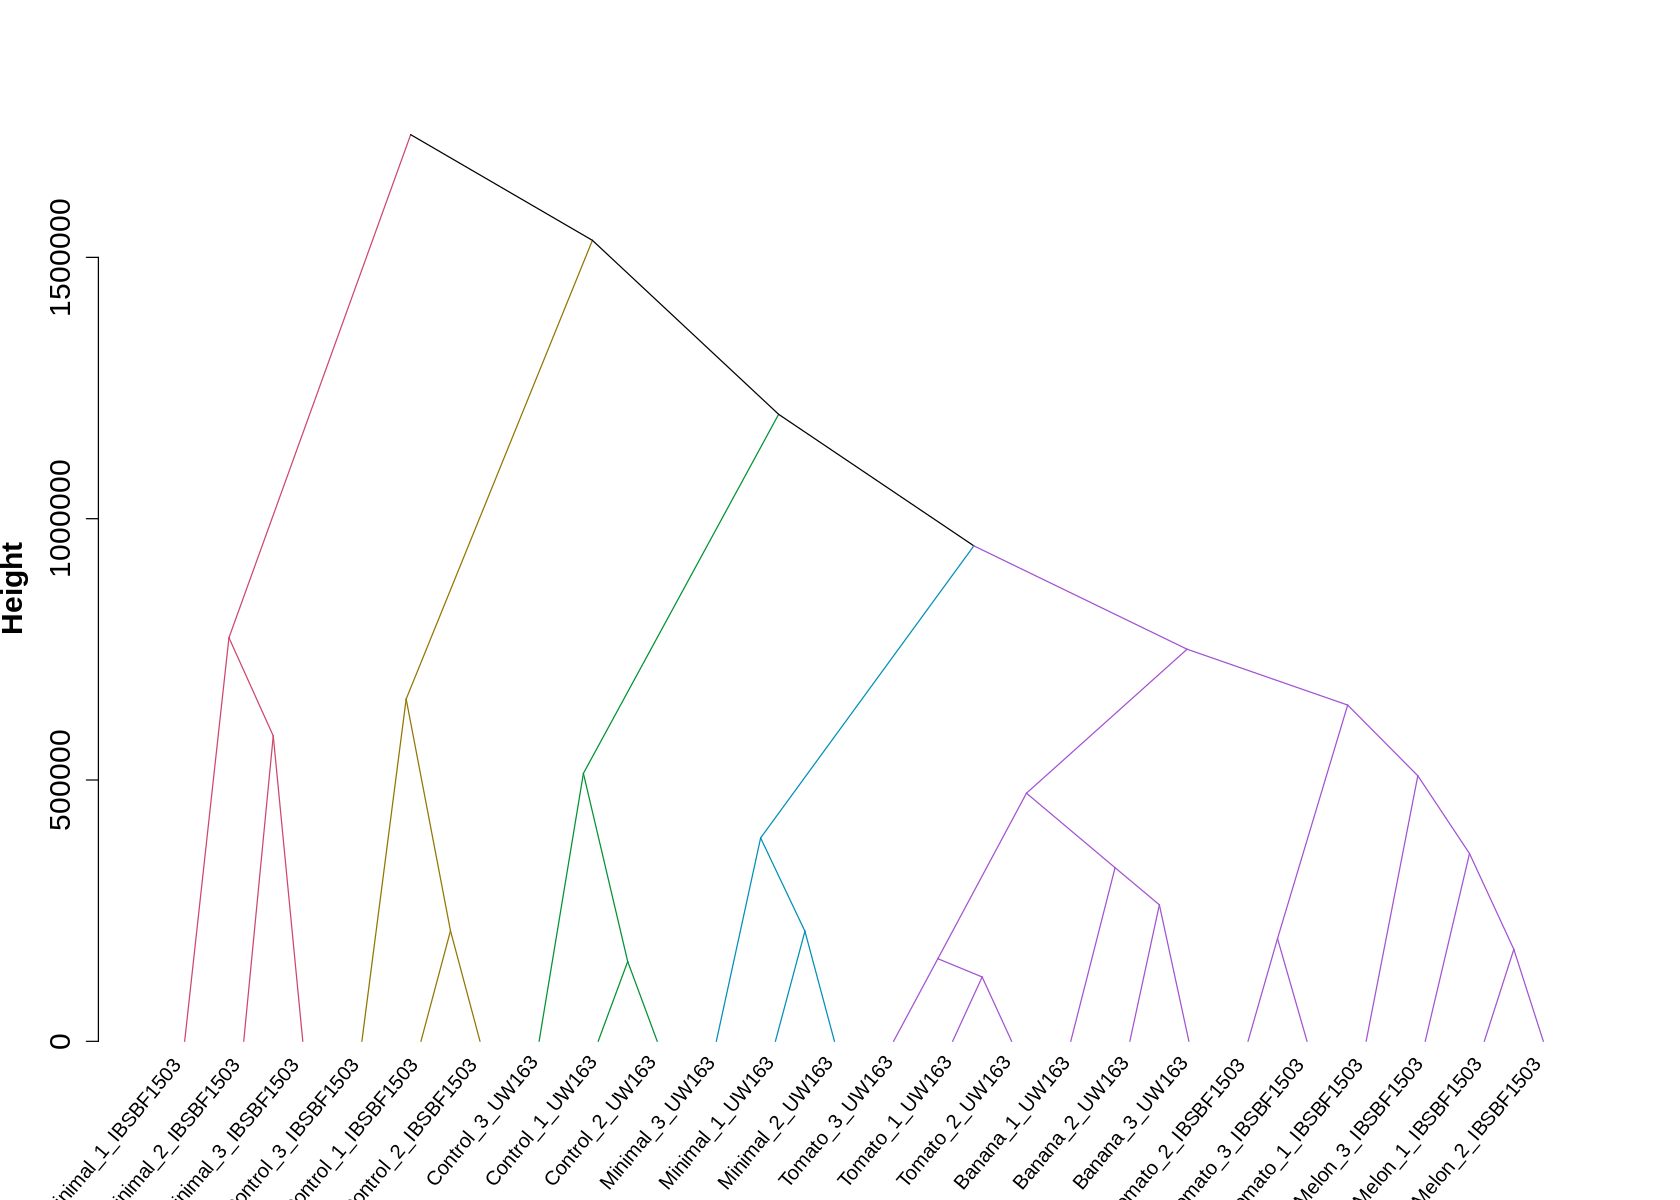

In [161]:
library(dendextend)
dend_labels <- labels(dend)
#labels(dend) <- ""
#plot(dend)
plot(dend, type = "triangle", ylab = "Height",font.lab=2,cex.axis=1.5,cex.lab=1.5,leaflab="none")
text(x = 1:length(dend_labels), labels = dend_labels, srt = 50, adj = c(1.1,1), xpd = T)

#### Strain UY301

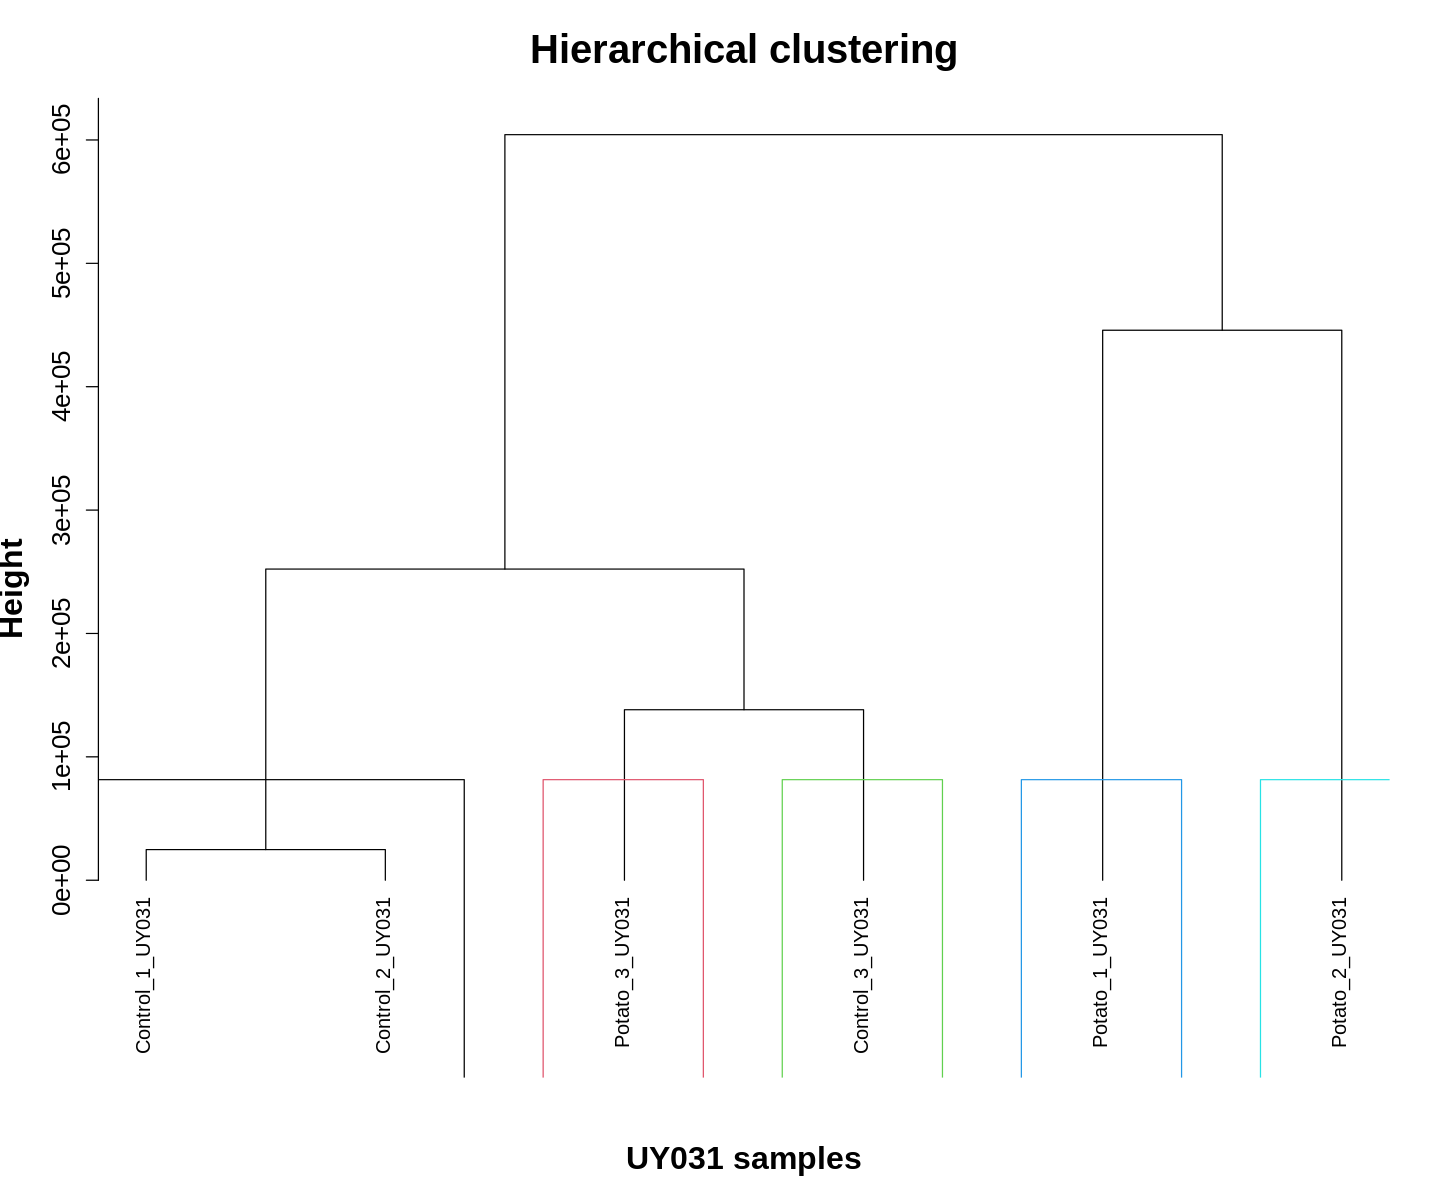

In [64]:
#------------------------------------------------------------------------------------#
#-------------------------Hierarchical clustering------------------------------------#
#------------------------------------------------------------------------------------#

clusters<-hclust(dist(t(counts(dds_UY031,normalized=T)),method='euclidian'),method='average')
clus2<-cutree(clusters,2)
#tiff(file="Hclust_UY.tiff", width=15, height=15, units="in", res=300)
#jpeg("Hclust_UY.jpg", width = 15, height = 15,units="in",res=300)
plot(clusters,hang=-1, main="Hierarchical clustering", sub = "",cex.main=2, ylab = "Height", cex.lab=1.6, xlab="UY031 samples", cex.axis=1.3,
    font.lab=2, font.sub=2)
rect.hclust(clusters,k=5,border=1:2:3:4:5)
Dendogram<-as.dendrogram(clusters)
Dendogram<-color_branches(clusters,k=2)
labels_cex(Dendogram)<-0.55

#dev.off()

### 3.5 DEGs dispersion plots

#### Strains UW163 & IBSBF1503

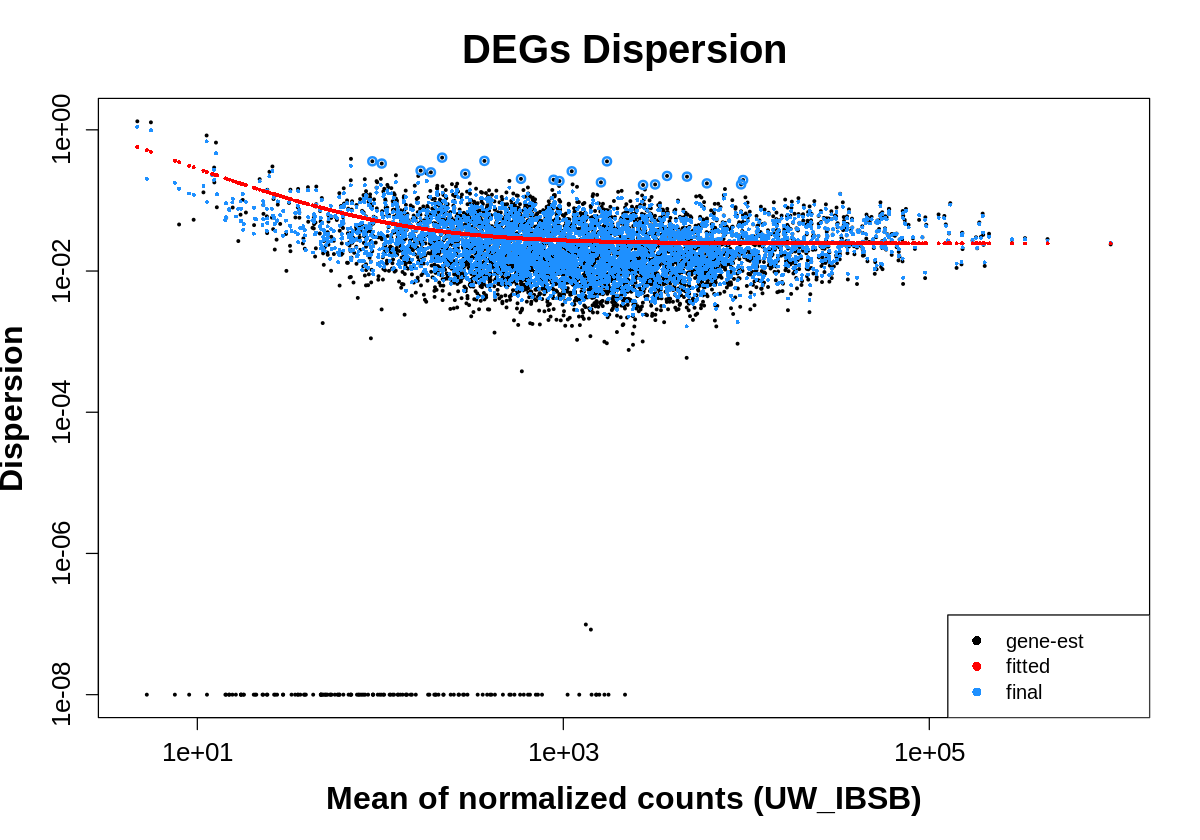

In [15]:
#------------------------------------------------------------#
#--------------------Dispersion Plot-------------------------#
#------------------------------------------------------------#
options(repr.plot.width = 10) 
options(repr.plot.height = 7) 
#tiff(file="Dispersion_UW_IBSB.tiff", width=15, height=15, units="in", res=300)
#jpeg("Disp_UW_IB.jpg", width = 15, height = 15,units="in",res=300)
disp_UW_IBSB<-DESeq2::plotDispEsts(dds_both,xlab = "Mean of normalized counts (UW_IBSB)", ylab="Dispersion",cex.lab=1.6,cex.axis=1.3,
                                  font.lab=2, font.sub=2)
title("DEGs Dispersion", cex.main=2)
#dev.off()

#### Strain UY301

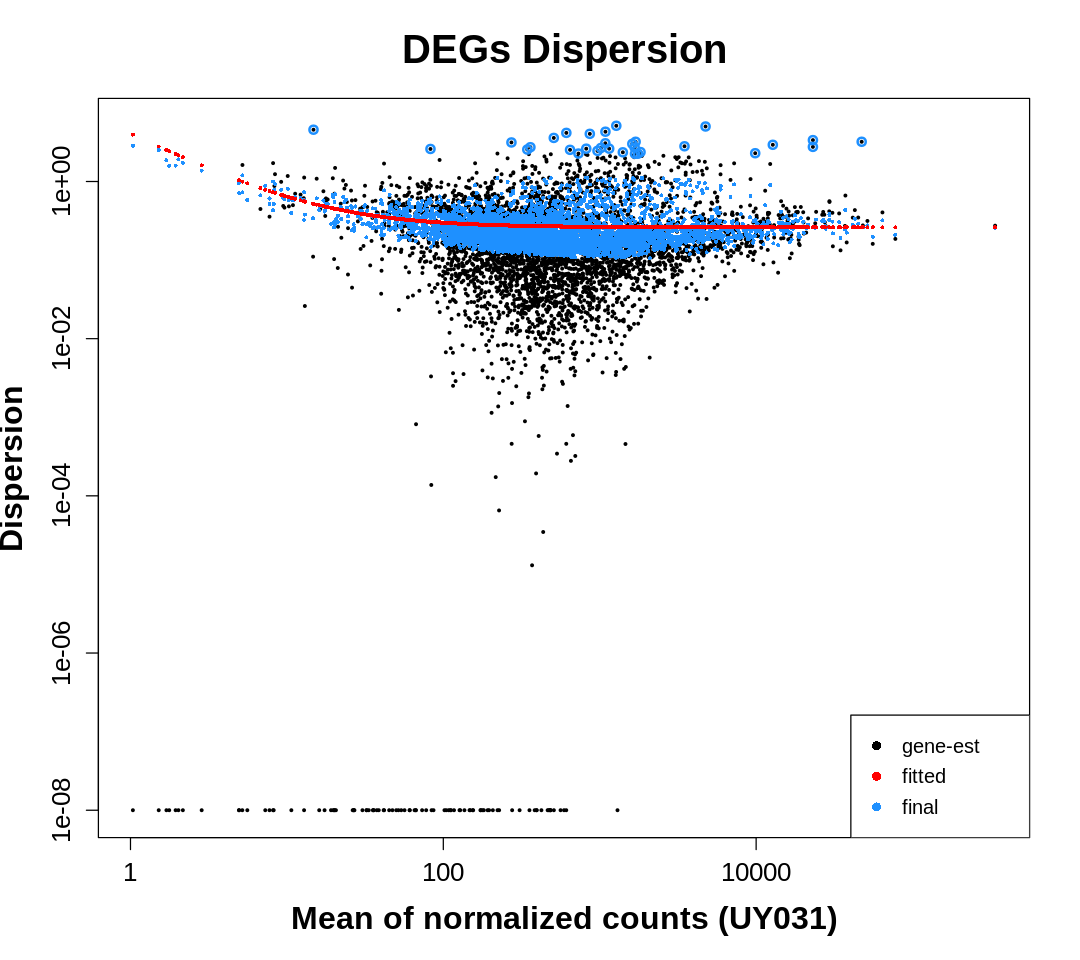

In [20]:
#------------------------------------------------------------#
#--------------------Dispersion Plot-------------------------#
#------------------------------------------------------------#
options(repr.plot.width = 9) 
options(repr.plot.height = 8) 

#tiff(file="Disp_UY.tiff", width=15, height=15, units="in", res=300)
#jpeg("Disp_UY.jpg", width = 15, height = 15,units="in",res=300)

vsd <- vst(dds_UY031, blind=FALSE)
disp_UY<-DESeq2::plotDispEsts(dds_UY031,xlab = "Mean of normalized counts (UY031)", ylab="Dispersion",cex.lab=1.6,cex.axis=1.3,
                             font.sub=2,font.lab=2)
title("DEGs Dispersion", cex.main=2)
#dev.off()

### 3.5 DEGs MA-plot

#### Strain UW163 

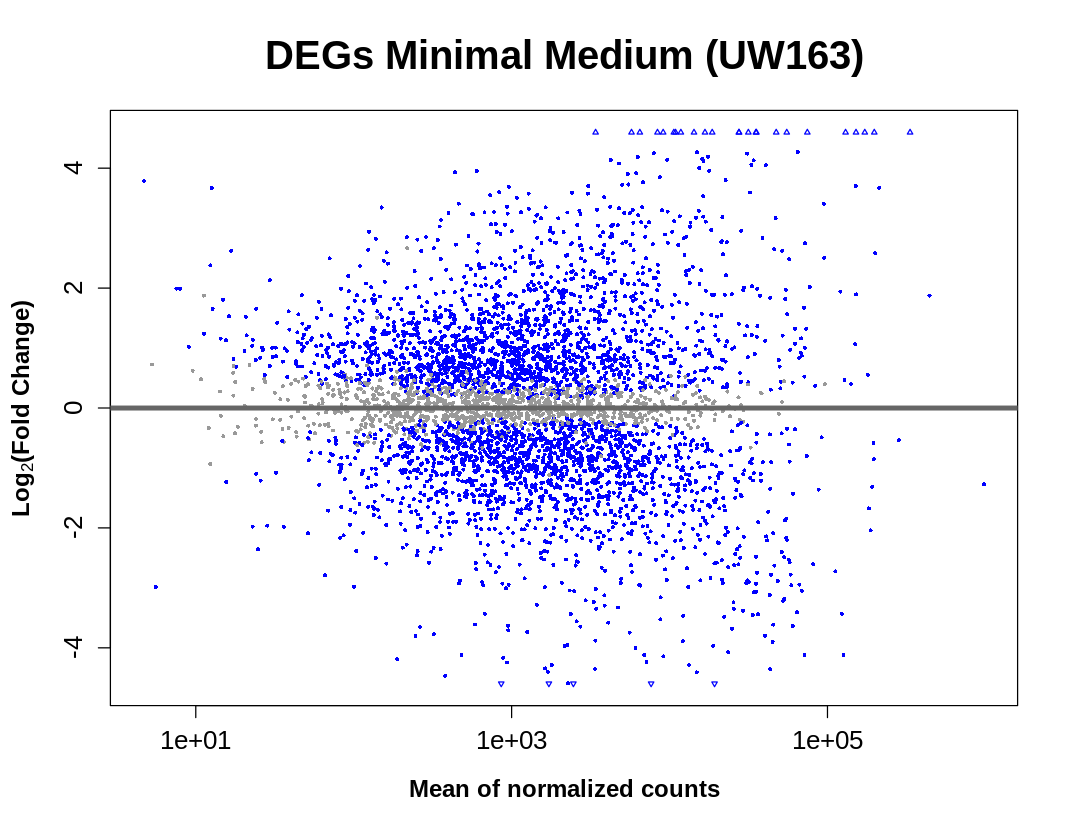

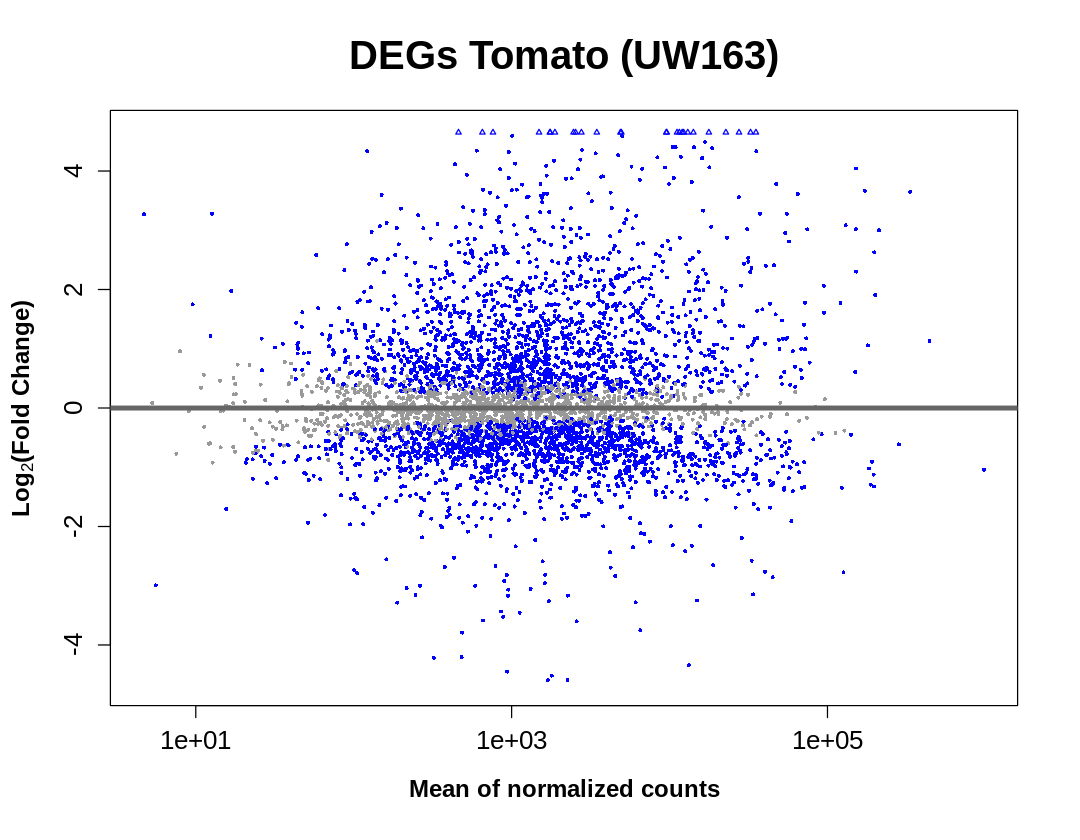

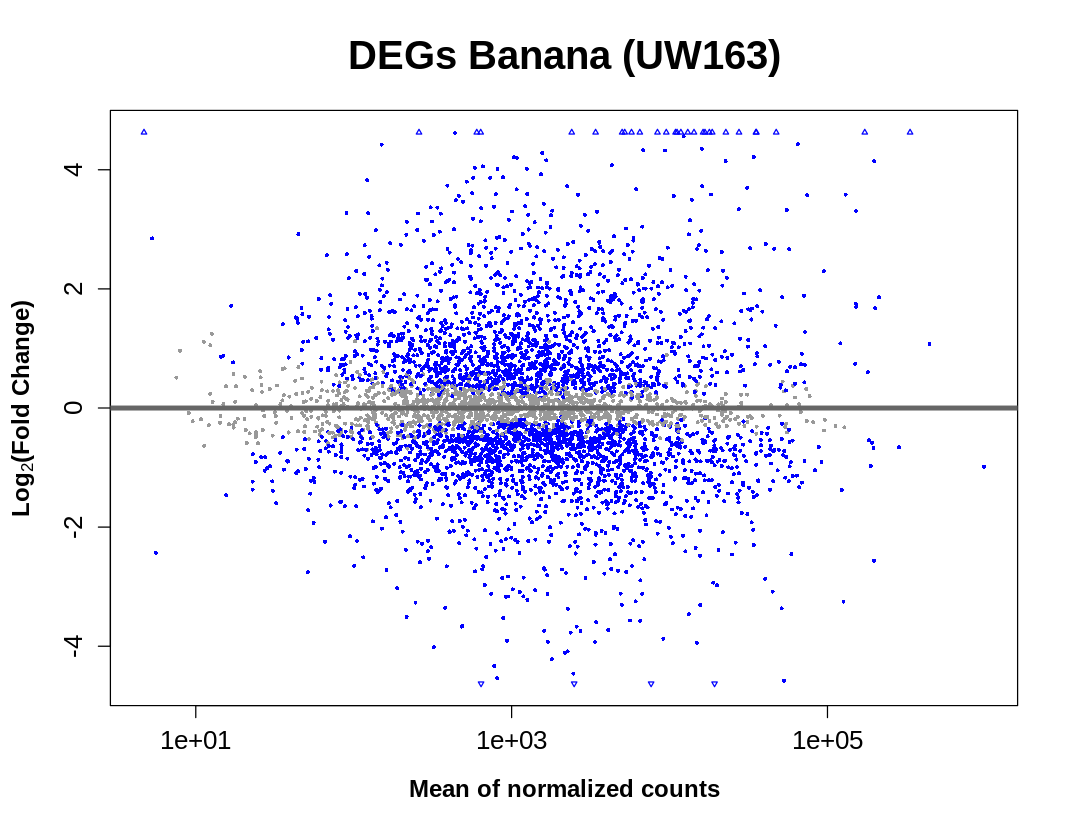

In [75]:
#------------------------------------------------------------#
#--------------------- Parameter Plot------------------------#
#------------------------------------------------------------#
options(repr.plot.width = 9) 
options(repr.plot.height = 7) 
par(mai=c(1.0,0.8,0.8,0.4)+0.01, mar=c(5,4,4,2)+0.6)

#------------------------------------------------------------#
#-------------------- Minimal UW163 MA Plot------------------#
#------------------------------------------------------------#
#tiff(file="MA-plot_UW_minimal.tiff", width=15, height=15, units="in", res=300)
#jpeg("MA-plot_UW_minimal.jpg", width = 15, height = 15,units="in",res=300)
plotM <- plotMA(res_mUW163, cex.lab=1.2,cex.axis=1.3,font.lab=2,
         xlab = "Mean of normalized counts", ylab=expression(bold(paste(Log[2],"(Fold Change)"))))
title("DEGs Minimal Medium (UW163)", cex.main=2)
#dev.off()
#------------------------------------------------------------#
#-------------------- Tomato UW163 MA Plot-------------------#
#------------------------------------------------------------#
#tiff(file="MA-plot_UW_tomato.tiff", width=17, height=15,units="in", res=300)
#jpeg("MA-plot_UW_tomato.jpg", width = 15, height = 15,units="in",res=300)
plotT <- plotMA(res_tUW163, cex.lab=1.2,cex.axis=1.3,font.lab=2,
         xlab = "Mean of normalized counts",ylab=expression(bold(paste(Log[2],"(Fold Change)"))))
title("DEGs Tomato (UW163)",cex.main=2)
#dev.off()
#------------------------------------------------------------#
#-------------------- Banana UW163 MA-Plot-------------------#
#------------------------------------------------------------#
#tiff(file="MA-plot_UW_banana.tiff", width=17, height=15, units="in", res=300)
#jpeg("MA-plot_UW_banana.jpg", width = 15, height = 15,units="in",res=300)
plotB <- plotMA(res_bUW163,  cex.lab=1.2,cex.axis=1.3,font.lab=2,
                xlab = "Mean of normalized counts", ylab=expression(bold(paste(Log[2],"(Fold Change)"))))
title("DEGs Banana (UW163)",cex.main=2)
#dev.off()



#### Strain IBSBF1503 

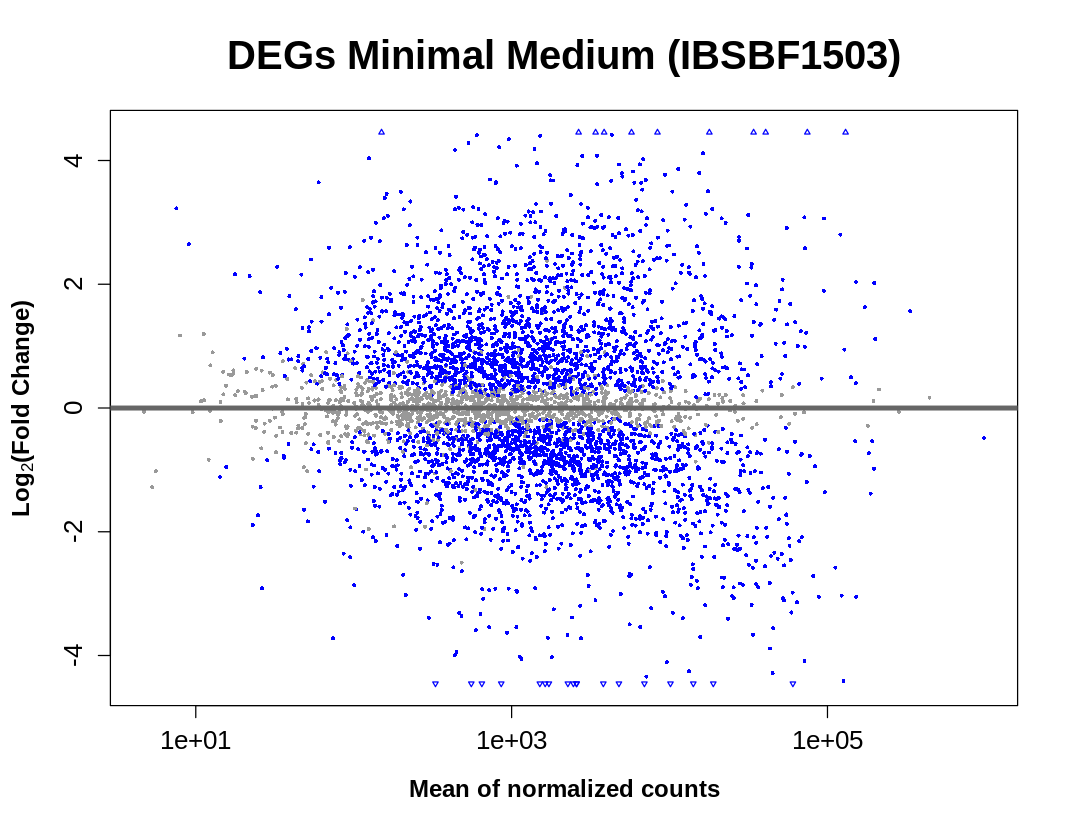

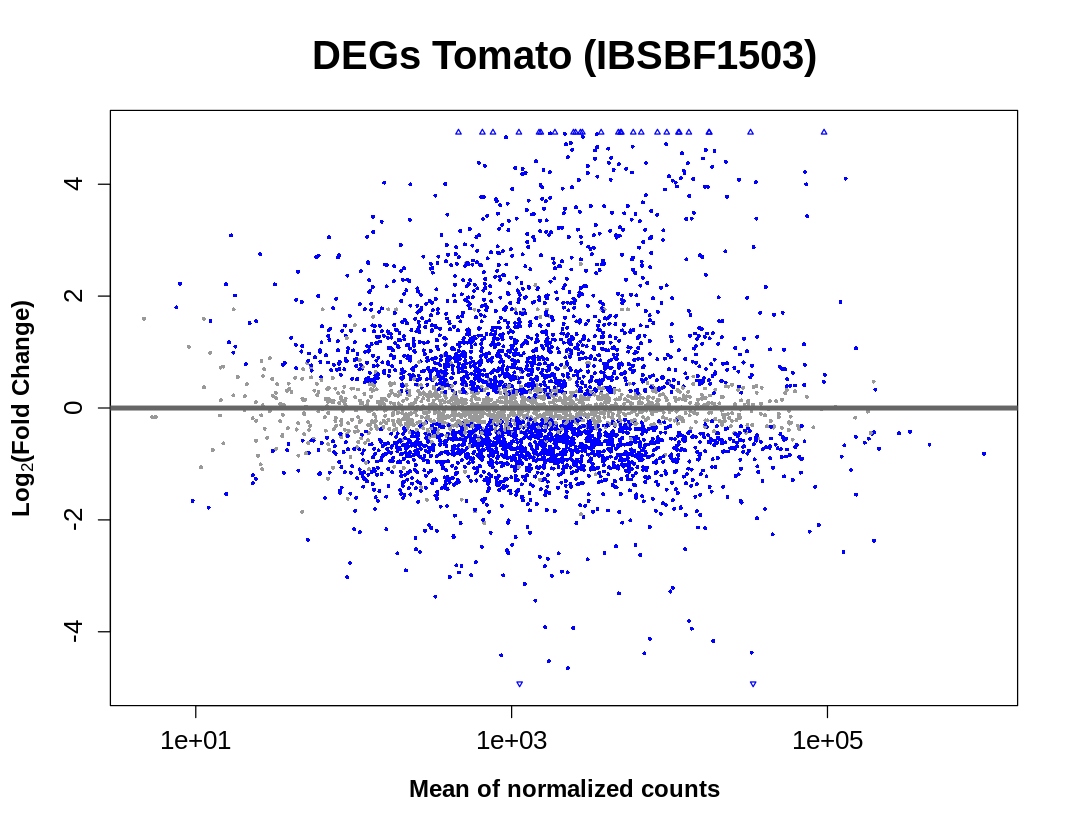

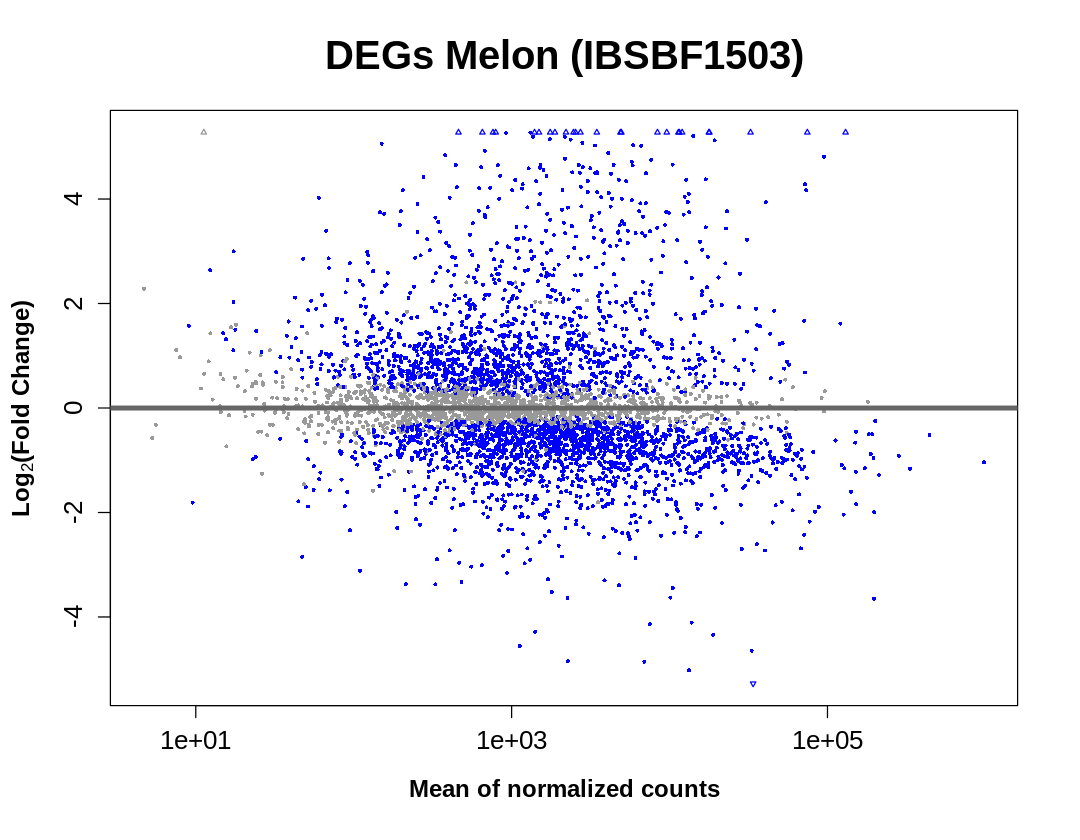

In [80]:
#------------------------------------------------------------#
#--------------------- Parameter Plot------------------------#
#------------------------------------------------------------#
options(repr.plot.width = 9) 
options(repr.plot.height = 7) 
par(mai=c(1.0,0.8,0.8,0.4)+0.01, mar=c(5,4,4,2)+0.6)

#------------------------------------------------------------#
#-------------------- Minimal IBSBF MA Plot------------------#
#------------------------------------------------------------#
#tiff(file="MA-plot_IBSB_Minimal.tiff", width=17, height=15, units="in", res=300)
#jpeg("MA-plot_IBSB_Minimal.jpg", width = 15, height = 15,units="in",res=300)
plotM <- plotMA(res_mIBSB, cex.lab=1.2,cex.axis=1.3,
         xlab = "Mean of normalized counts", font.lab=2,
         ylab=expression(bold(paste(Log[2],"(Fold Change)"))))
title("DEGs Minimal Medium (IBSBF1503)", cex.main=2)
#dev.off()
#------------------------------------------------------------#
#-------------------- Tomato IBSBF MA Plot-------------------#
#------------------------------------------------------------#
#tiff(file="MA-plot_IBSB_Tomato.tiff", width=17, height=15, units="in", res=300)
#jpeg("MA-plot_IBSB_Tomato.jpg", width = 15, height = 15,units="in",res=300)
plotT <- plotMA(res_tIBSB, cex.lab=1.2,cex.axis=1.3,
         xlab = "Mean of normalized counts",font.lab=2,
         ylab=expression(bold(paste(Log[2],"(Fold Change)"))))
title("DEGs Tomato (IBSBF1503)",cex.main=2)
#dev.off()

#------------------------------------------------------------#
#-------------------- Melon IBSBF MA-Plot--------------------#
#------------------------------------------------------------#
#tiff(file="MA-plot_IBSB_Melon.tiff", width=17, height=15, units="in", res=300)
#jpeg("MA-plot_IBSB_Melon.jpg", width = 15, height = 15,units="in",res=300)
plotB <- plotMA(res_meIBSB,  cex.lab=1.2,cex.axis=1.3,
         xlab = "Mean of normalized counts",font.lab=2,
         ylab=expression(bold(paste(Log[2],"(Fold Change)"))))
title("DEGs Melon (IBSBF1503)",cex.main=2)
#dev.off()

#### Strain UY301

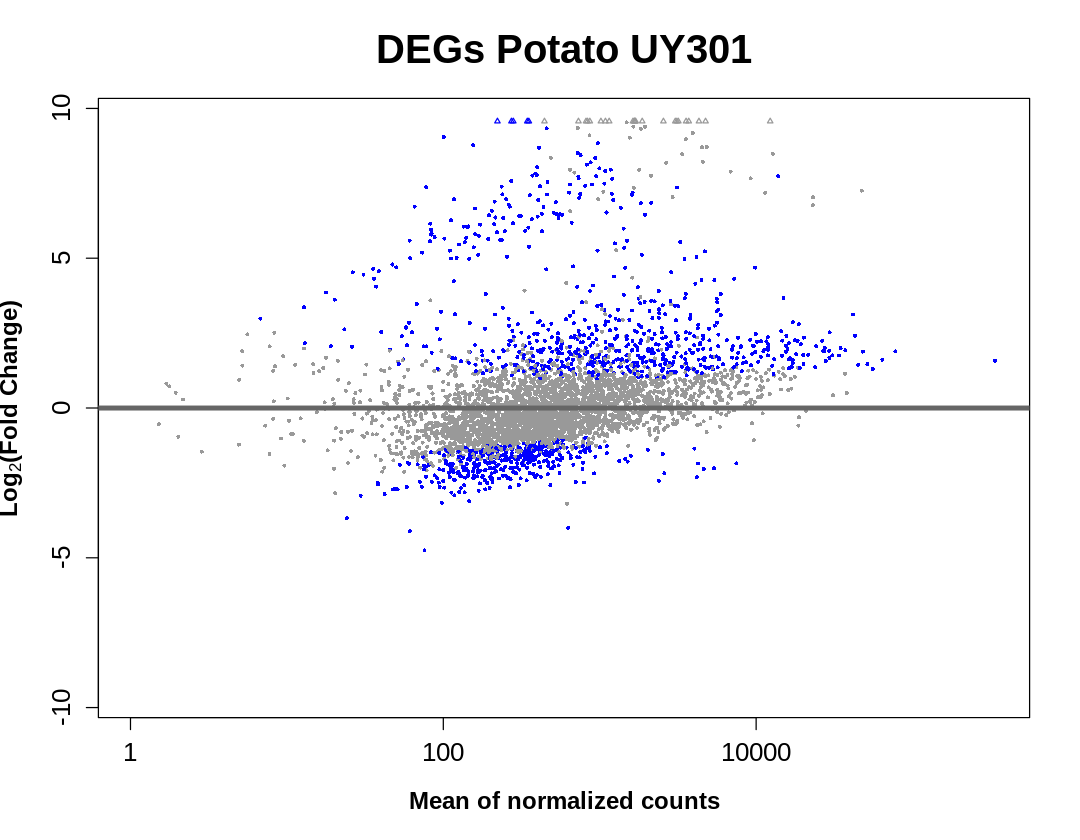

In [83]:
#------------------------------------------------------------#
#-------------------- Potato UY031 MA-Plot-------------------#
#------------------------------------------------------------#
#tiff(file="MA-plot_UY.tiff", width=17, height=15, units="in", res=300)
#jpeg("MA-plot_UY.jpg", width = 15, height = 15,units="in",res=300)
plotB <- plotMA(res_UY031,  cex.lab=1.2,cex.axis=1.3,font.lab=2,
         xlab = "Mean of normalized counts", ylab=expression(bold(paste(Log[2],"(Fold Change)"))))
title("DEGs Potato UY301",cex.main=2)
#dev.off()

### 4. Identification of the common gene core between *R. solanacearum* strains UW163, IBSBF1503 and UY031.

## Vennyplot
https://bioinfogp.cnb.csic.es/tools/venny/

A: Ups DEGs B: Downs DEGs

#### Strain UW163

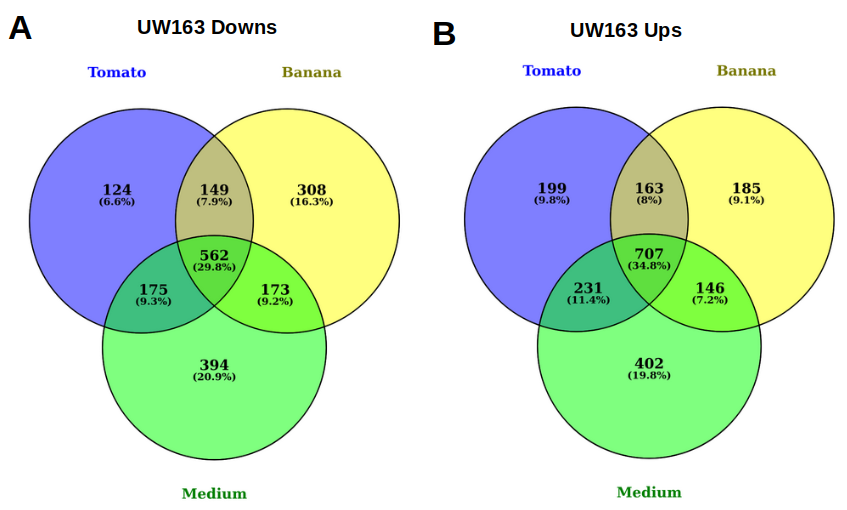

In [4]:
display_png(file="figures/Supplementary/JPG/UW163_venny.png")

#### Strain IBSBF1503

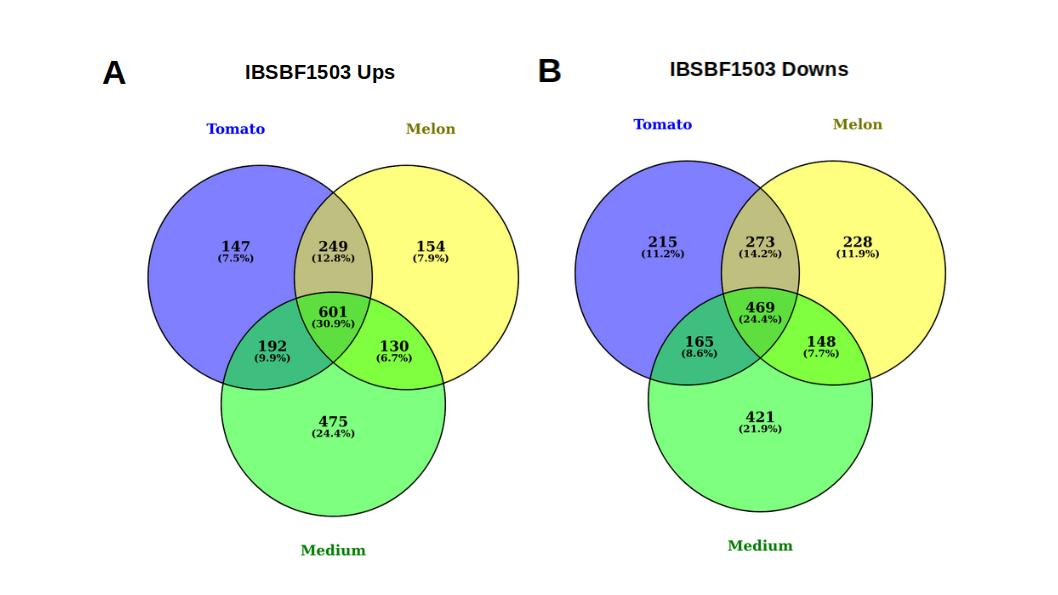

In [5]:
display_png(file="figures/Supplementary/JPG/IBSB_venny.jpg")

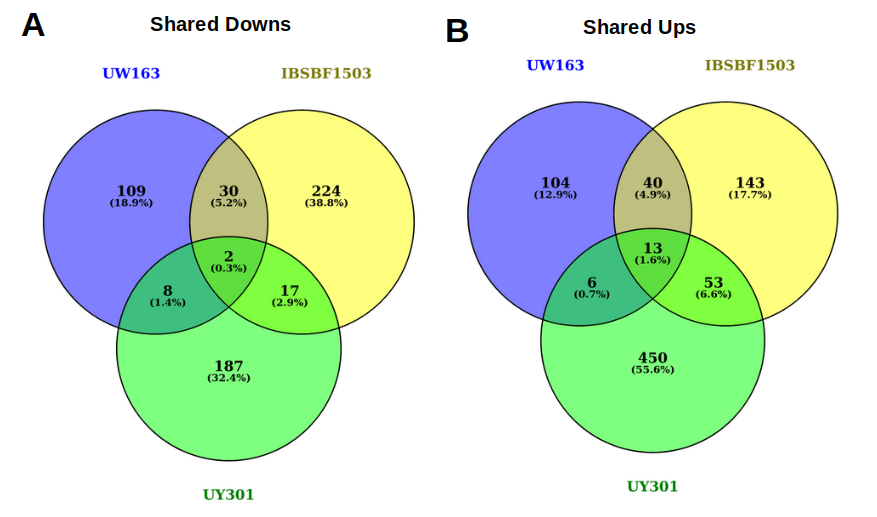

In [6]:
display_png(file="figures/Supplementary/JPG/Shared_venny.png")

## Upset plot

In [84]:
#------------------------------------------------------------#
#---------------Input Data-----------------------------------#
#------------------------------------------------------------#
upset<-read.table('upset/upset.txt',header=T,sep='\t',row=1)
head(upset)

,UW163,IBSBF1503,UY031,Class
,<int>,<int>,<int>,<chr>
a1,1,1,1,Yes
a2,1,1,1,Yes
a3,1,1,1,Yes
a4,1,1,1,Yes
a5,1,1,1,Yes
a6,1,1,1,Yes


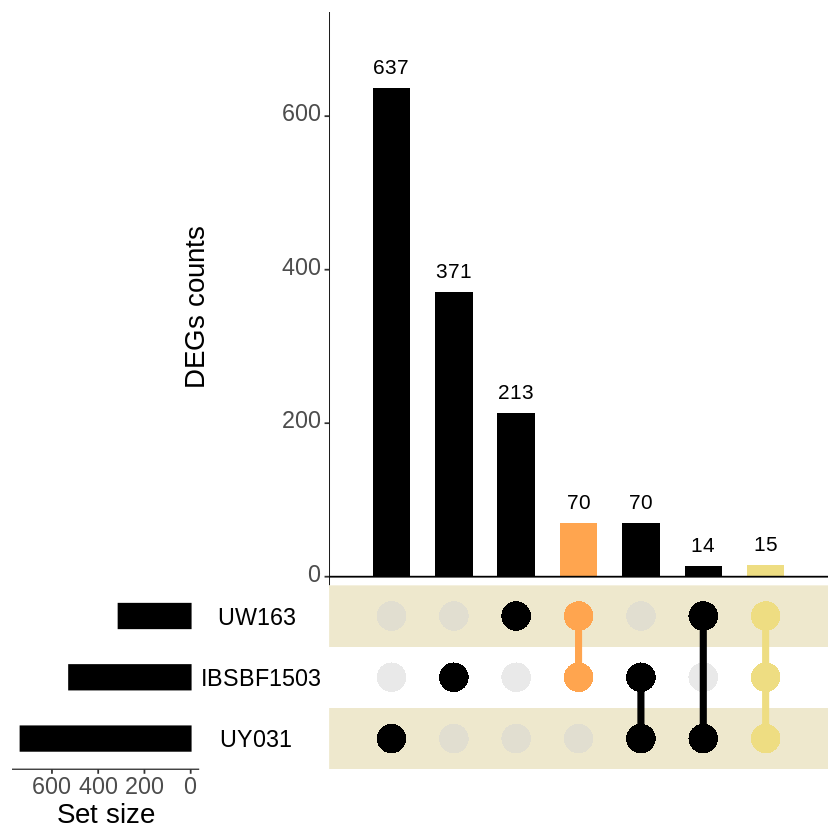

In [44]:
#------------------------------------------------------------#
#----------------Upset plotting------------------------------#
#------------------------------------------------------------#
#tiff(file="Upset_plot.tiff", width=15, height=15, units="in", res=300)
UpSetR::upset(upset,nsets=3,main.bar.color='black',point.size=8,line.size=2,
      sets.bar.color = "black",shade.alpha=1,shade.color="cornsilk2",
      matrix.color="black",mainbar.y.label = "DEGs counts",
      text.scale=2,sets.x.label ="Set size",
      queries=list(list(query = intersects,params = list("IBSBF1503","UW163","UY031"),
      matrix.dot.alpha = 0.2, color = "lightgoldenrod", active = T),list(query = intersects, 
      params = list("IBSBF1503", "UW163"), color="tan1",active = T)))
#dev.off()

## Heatmap

#### UW163 & IBSBF1503

In [55]:
#------------------------------------------------------------#
#------------Common gene core between UW163 and IBSBF1503----#
#---------------------------------------- --------------------#
shared_2 <-read.table('heatmap/core_genes.txt',sep='\t',header=T)

#------------------------------------------------------------#
#-------------------Mapping the common gene core-------------#
#------------------------------------------------------------#
shared_2_name <-as.character(shared_2$Gene_id)
count_shared_2 <- (both_L)[shared_2_name, ]
count_shared_2 <- (counts(dds_both,normalized=TRUE))[shared_2_name, ]
#write.csv(as.data.frame(count_shared_2), file="Ensayo_count_shared_2.csv")


#-----------------------------------------------------------------------#
#--Scale the average of normalized counts from the common gene core-----#
#-----------------------------------------------------------------------#
shared_2 <-read.table('heatmap/Matriz_for_scaling_ALL.txt',sep='\t',header=T, row.names = 1)
scaling <- t(scale(t(shared_2)))
#write.csv(as.data.frame(scaling), file="scaling.csv")

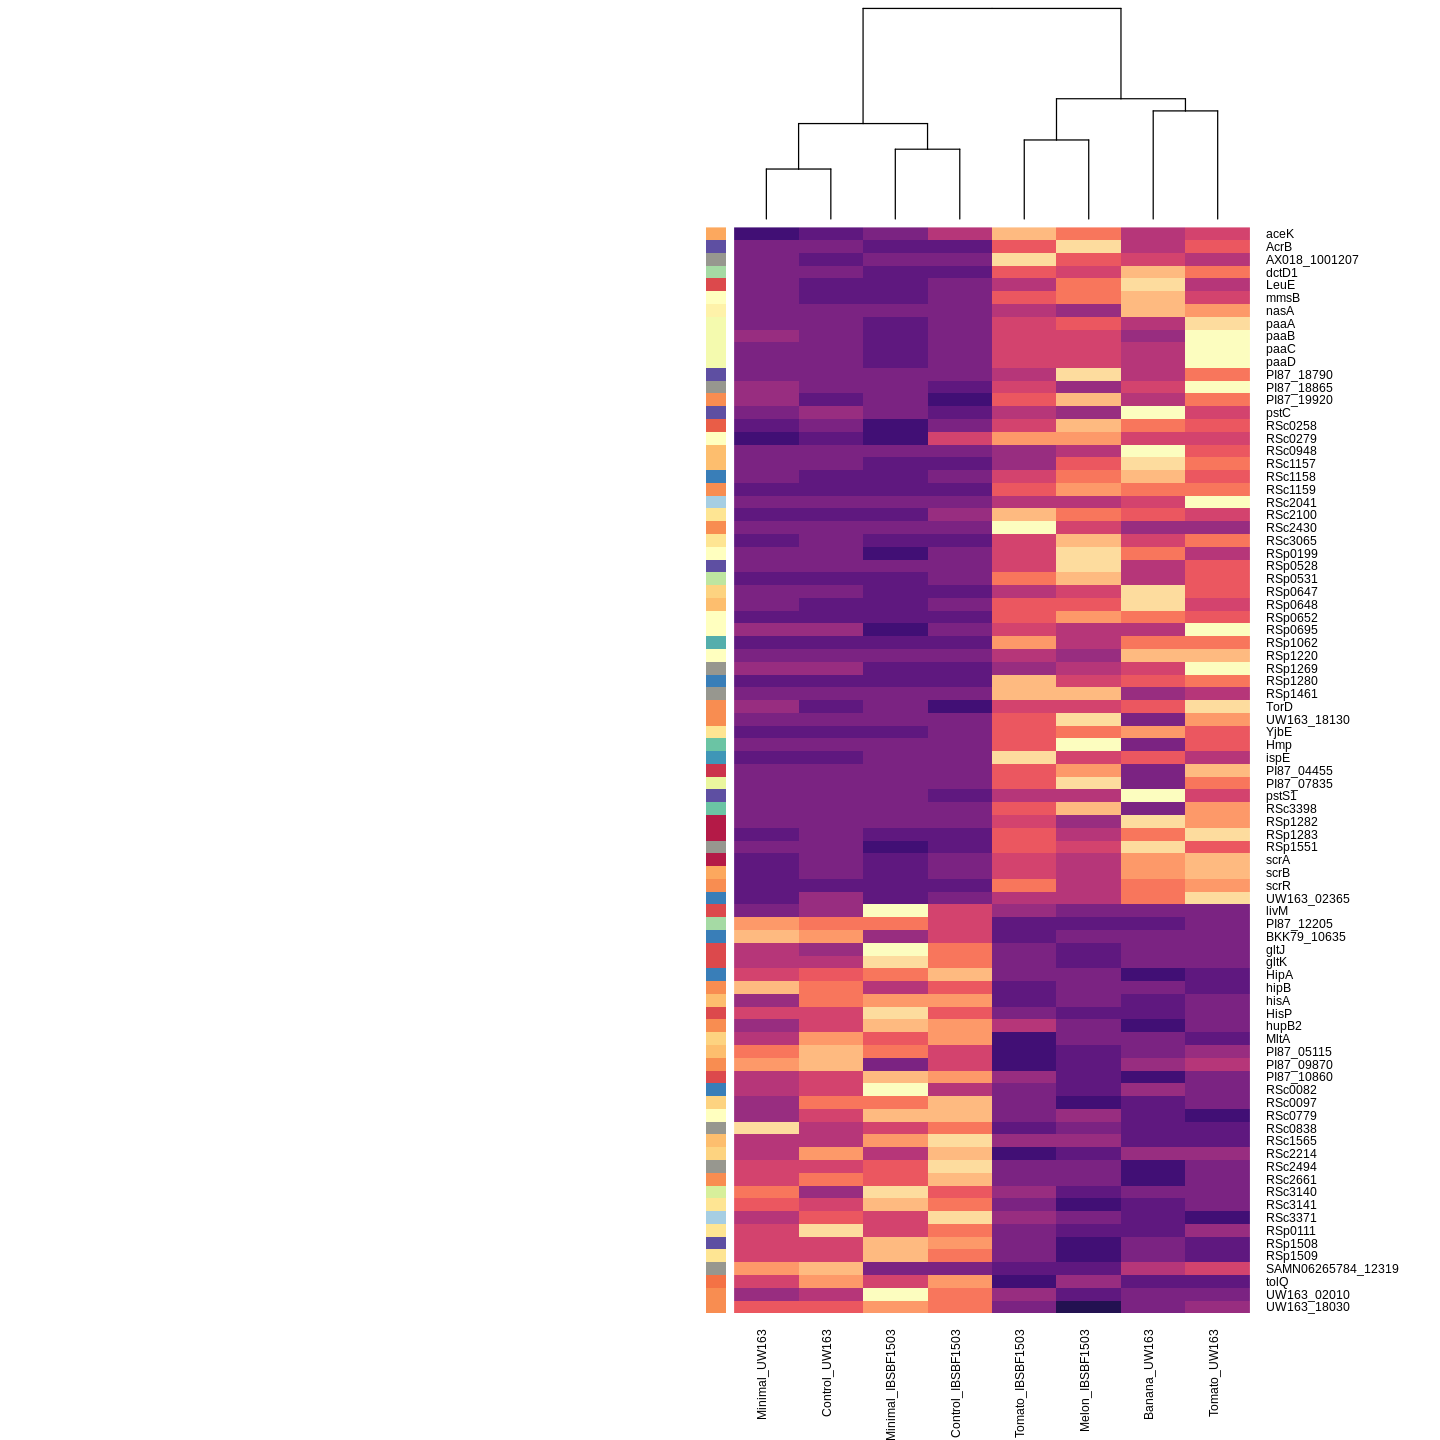

In [56]:
#------------------------------------------------------------#
#-------------------------Plotting---------------------------#
#------------------------------------------------------------#
options(repr.plot.width = 12)
options(repr.plot.height = 12)

shared_2 <-read.table('heatmap/scaling_colors.txt',sep='\t', header=T, row.names = 1)
colors <- read.table('heatmap/colors.txt', header = FALSE, sep = "", quote = "\"'")
colors <- as.vector(colors$V1)
shared_2 <- as.matrix(shared_2)

#tiff(file="Heatmap.tiff", width=12, height=12, units="in", res=300)
heat_shared2 <- heatmap.2(shared_2,trace='none',col=magma, scale='none', Colv=T, dendrogram="column", key=F, 
                margins=c(8,12), lwid = c(5,5),lhei = c(3,16), density.info = "none", labRow=, key.xlab="Z-score",
                cexCol= 0.92,  Rowv=FALSE, RowSideColors= colors,cexRow= 0.93)
#dev.off()

#### UW163, IBSBF1503 & UY031

In [20]:
#------------------------------------------------------------#
#----Common gene core between UW163, IBSB and UY031----------#
#------------------------------------------------------------#
shared_3 <-read.table('heatmap/genes_three_strains.txt',sep='\t',header=T)

#------------------------------------------------------------#
#------------------Mapping the common gene core--------------#
#------------------------------------------------------------#
shared_3_name <-as.character(shared_3$Gene_id)
count_shared_3 <- (both_L)[shared_3_name, ]
count_shared_3 <- (counts(dds_both,normalized=TRUE))[shared_3_name, ] 
#write.csv(as.data.frame(count_shared_3), file="count_shared_3_UW_IB_.csv")


shared_3_name <-as.character(shared_3$Gene_id)
count_shared_3 <- (UY031_F)[shared_3_name, ]
count_shared_3 <- (counts(dds_UY031,normalized=TRUE))[shared_3_name, ] 
#write.csv(as.data.frame(count_shared_3), file="count_shared_3_UY.csv")

In [22]:
#-----------------------------------------------------------------------#
#--Scale the average of normalized counts from the common gene core-----#
#-----------------------------------------------------------------------#
shared_3 <-read.table('heatmap/Matriz_for_scaling_ALL.txt',sep='\t',header=T, row.names = 1)
scaling <- t(scale(t(shared_3)))
colors <- read.table('heatmap/colors_ALL.txt', header = FALSE, sep = "", quote = "\"'")
colors <- as.vector(colors$V1)

#------------------------------------------------------------#
#-------------------------Plotting---------------------------#
#------------------------------------------------------------#
options(repr.plot.width = 9)
options(repr.plot.height = 5)

#tiff(file="Heatmap_all.tiff", width=9, height=5, units="in", res=300)
heat_shared2 <- heatmap.2(scaling,trace='none',col=magma, scale='none', Colv=T, dendrogram="column", key=F, 
                margins=c(8,12), lwid = c(5,5),lhei = c(3,16), density.info = "none", labRow=, key.xlab="Z-score",
                cexCol= 0.92,  Rowv=FALSE, RowSideColors= colors,cexRow= 0.95)

#dev.off()

png 
  2

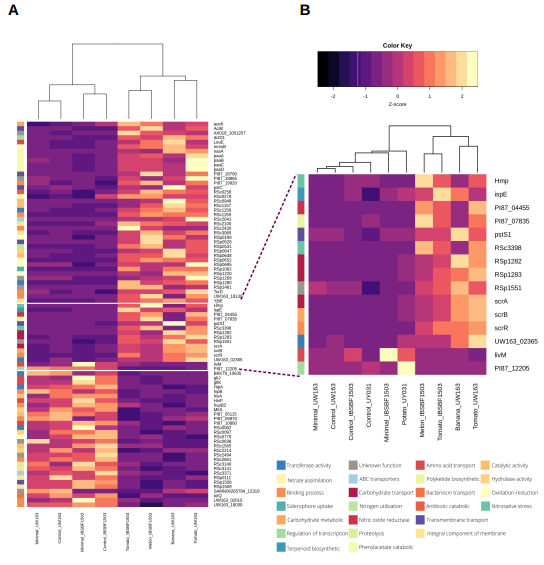

In [50]:
display_png(file='figures/Heatmap_completed.png')

### Fold Change plot

In [27]:
#-------------------------------------------------------------#
#------------------------Input Data---------------------------#
#-------------------------------------------------------------#
FC_plot <- read.delim ("dotplot/FC_toplot.txt", sep=',',header=T)
FC_plot <- FC_plot[order(FC_plot$mean_FC),]
#FC_plot$Function <- as.character(GO_matrix$proteins)
FC_plot$Function <- factor(FC_plot$Function, levels=unique(FC_plot$Function))
head(FC_plot)

,Locus_tag,Genes,Function,mean_FC,Group
,<chr>,<chr>,<fct>,<dbl>,<chr>
28,UW163_08590,hupB2,Binding process,-1.711418,UW_IBSB
26,UW163_08150,RSc2661,Binding process,-1.498075,UW_IBSB
50,UW163_18020,RSp1509,Integral component of membrane,-1.491802,UW_IBSB
51,UW163_18025,RSp1508,Transmebrane transport,-1.339827,UW_IBSB
29,UW163_08745,RSc2494,Unknown function,-1.310435,UW_IBSB
6,UW163_02015,gltK,Amino acid transport,-1.303526,UW_IBSB


In [28]:
#------------------------------------------------------------#
#-------------------------Theme ggplot-----------------------#
#------------------------------------------------------------#
My_Theme = theme(
  axis.title.x = element_text(size=19, vjust=0.0005,face="bold"),
  axis.text.x=element_text(color="black", angle = -70, hjust = 0, vjust= 0, size=12),
  axis.title.y =element_text(size=20, vjust=1,face="bold"),
  axis.text.y = element_text(size = 15,color = "black"),
  strip.text.x= element_text(size = 22),
  panel.background = element_rect(fill = "grey98"),
  legend.spacing.y = unit(0.8, 'cm'),
  legend.key.size = unit(1.0, "cm"),
  legend.key.width = unit(0.8,"cm"),
  legend.title = element_text(size=16, face="bold"),
  legend.text = element_text(size = 14))
  #legend.title = element_blank())

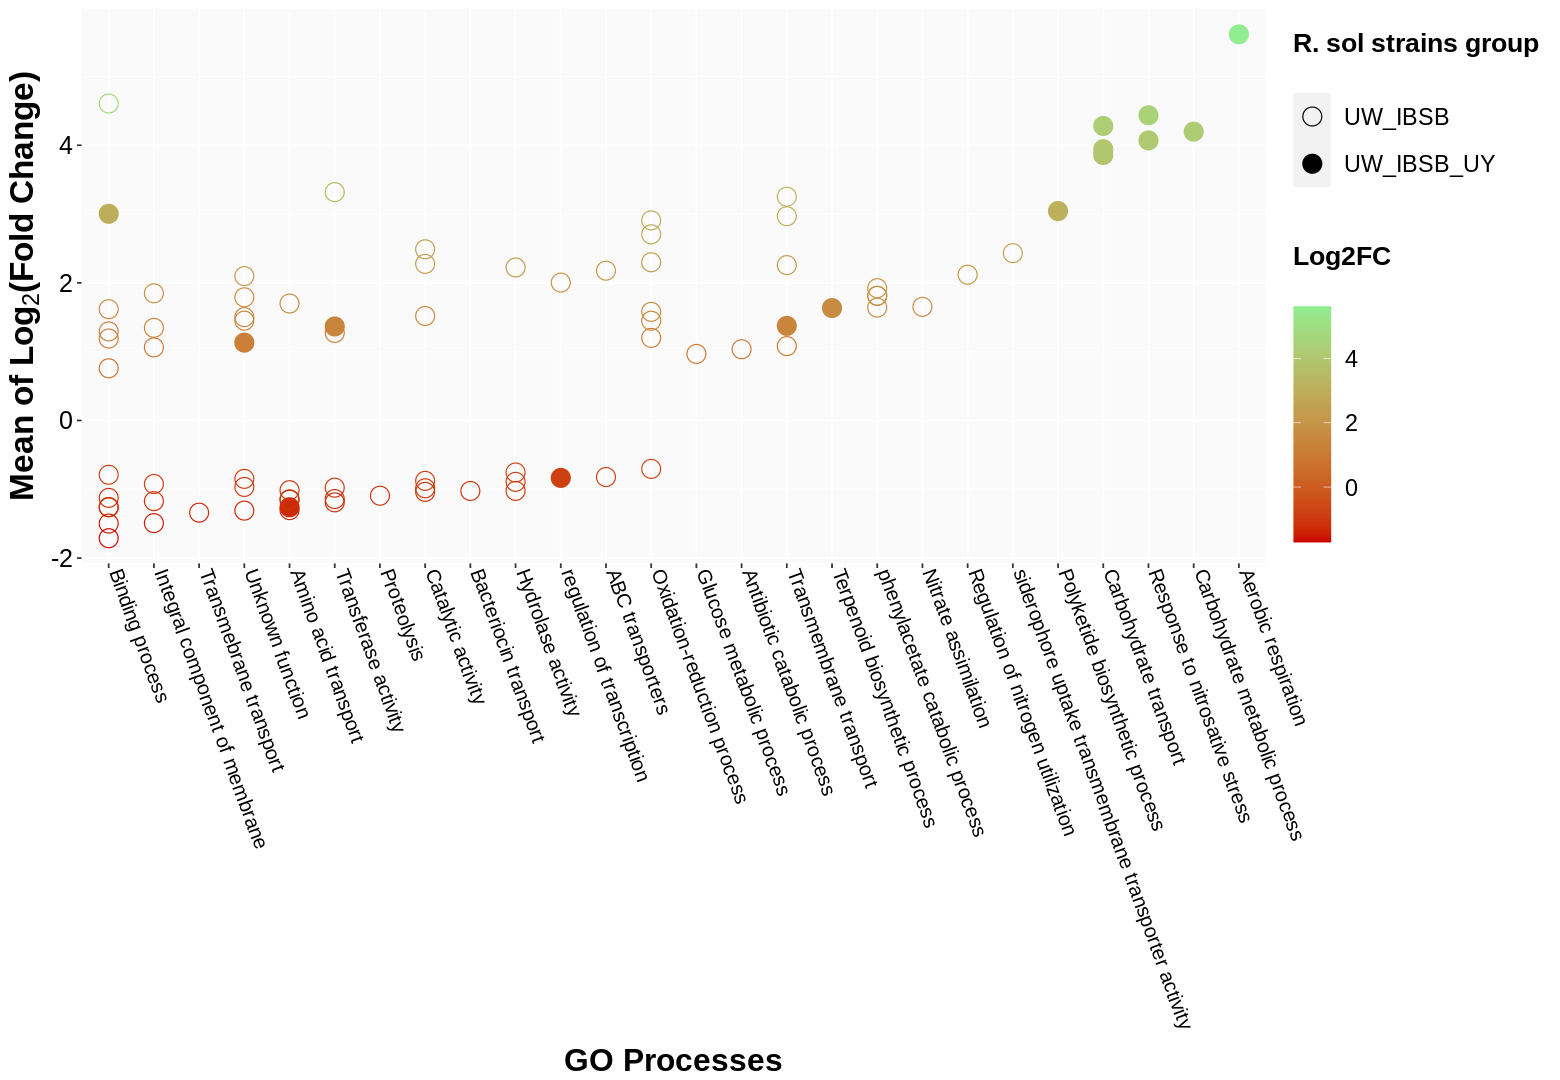

In [33]:
#------------------------------------------------------------#
#---------------------------FC plot--------------------------#
#------------------------------------------------------------#
options(repr.plot.width = 13)
options(repr.plot.height = 9)

#tiff(file="FC_plot.tiff", width=15, height=15, units="in", res=300)
#jpeg("FC_plot.jpg", width = 15, height = 15,units="in",res=300)
dots <- ggplot(FC_plot, aes(x =Function, y = mean_FC)) +
        My_Theme + geom_point(size=5,aes(color = mean_FC,size=mean_FC,shape=Group)) +
        xlab("GO Processes") +  ylab(expression(bold(paste("Mean of ",Log[2],"(Fold Change)"))))+
        scale_color_gradient(low="#CC0000", high="lightgreen",breaks=c(-2,0,2,4))+
        scale_shape_manual(values=c(21, 19))+labs(color="Log2FC",shape="R. sol strains group")

dots
#dev.off()

### Barplot

### Common gene core between UW163 and IBSBF1503

In [2]:
#-------------------------------------------------------------#
#------------------------Input Data---------------------------#
#-------------------------------------------------------------#
GO_matrix <- read.delim ("barplot/barplot_2.txt", header=T)
head(GO_matrix)

,Process,Chromosome_Ups,Chromosome_Downs,Plasmid_Ups,Plasmid_Downs,Counts
,<chr>,<int>,<int>,<int>,<int>,<int>
1,ABC transporters,1,1,0,0,2
2,Amino acid transport,1,4,0,0,5
3,Antibiotic catabolic process,1,0,0,0,1
4,Bacteriocin transport,0,1,0,0,1
5,Binding process,4,3,1,3,11
6,Catalytic activity,2,2,1,1,6


In [3]:
#-------------------------------------------------------------#
#------------------------Plot Wrangling-----------------------#
#-------------------------------------------------------------#
GO_matrix<- GO_matrix[,-6]
GOS_plasmid2 <- data.frame(GO_matrix$Process,GO_matrix$Plasmid_Ups,GO_matrix$Plasmid_Downs)
colnames(GOS_plasmid2) <- c("Process", "Ups", "Downs")
GOS_plasmid<- melt(GOS_plasmid2, id.vars = c("Process"))
GOS_plasmid$title <- "Megaplasmid Location"
GOS_plasmid <- GOS_plasmid[order(GOS_plasmid$Process),]


GOS_Genome2 <- data.frame(GO_matrix$Process,GO_matrix$Chromosome_Ups,GO_matrix$Chromosome_Downs)
colnames(GOS_Genome2) <- c("Process", "Ups", "Downs")
GOS_Genome<- melt(GOS_Genome2, id.vars = c("Process"))
GOS_Genome$title <- "Chromosome Location"
GOS_Genome <- GOS_Genome[order(GOS_Genome$Process),]


### Common gene core between UW163, IBSBF1503 and UY031

In [4]:
#-------------------------------------------------------------#
#------------------------Input Data---------------------------#
#-------------------------------------------------------------#
GO_matrix3 <- read.delim ("barplot/barplot_3.txt", header=T)
head(GO_matrix3)

,Process,Chromosome_Ups,Chromosome_Downs,Plasmid_Ups,Plasmid_Downs,Counts
,<chr>,<int>,<int>,<int>,<int>,<int>
1,Transferase activity,1,0,0,0,1
2,Terpenoid biosynthetic process,1,0,0,0,1
3,Polyketide biosynthetic process,1,0,0,0,1
4,Response to nitrosative stress,1,0,1,0,2
5,Transmembrane transport,1,0,0,0,1
6,Aerobic respiration,0,0,1,0,1


In [5]:
#-------------------------------------------------------------#
#------------------------Plot Wrangling-----------------------#
#-------------------------------------------------------------#
GO_matrix3<- GO_matrix3[,-6]
GO3_plasmid2 <- data.frame(GO_matrix3$Process,GO_matrix3$Plasmid_Ups,GO_matrix3$Plasmid_Downs)
colnames(GO3_plasmid2) <- c("Process", "Ups", "Downs")
GO3_plasmid<- melt(GO3_plasmid2, id.vars = c("Process"))
GO3_plasmid$title <- "Megaplasmid Location"


GO3_Genome2 <- data.frame(GO_matrix3$Process,GO_matrix3$Chromosome_Ups,GO_matrix3$Chromosome_Downs)
colnames(GO3_Genome2) <- c("Process", "Ups", "Downs")
GO3_Genome<- melt(GO3_Genome2, id.vars = c("Process"))
GO3_Genome$title <- "Chromosome Location"

In [6]:
#------------------------------------------------------------#
#----------------------Theme chromosome plot-----------------#
#------------------------------------------------------------#
My_Theme_genome = theme(
  axis.title.x = element_text(size=17, vjust=0.001,face="bold"),
  axis.text.x = element_text(size = 17, color = "black", vjust=0.5),
  axis.title.y =element_text(size=17, vjust=2, face="bold"),
  axis.text.y = element_text(size = 15,color = "black" ),
  strip.text.x= element_text(size = 22),
  legend.position = "none",
  panel.background = element_rect(fill = "grey95"))

#axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)))


#------------------------------------------------------------#
#---------------------Theme plasmid plot---------------------#
#------------------------------------------------------------#
My_Theme_plasmid = theme(
  axis.title.x = element_text(size=17, vjust=0.001,face="bold"),
  axis.text.x = element_text(size = 17, color = "black", vjust=0.5),
  strip.text.x= element_text(size = 22),
  panel.background = element_rect(fill = "grey95"),
  axis.title.y=element_blank(),
  axis.text.y=element_blank(),
  axis.ticks.y=element_blank(),
  legend.spacing.y = unit(1.0, 'cm'),
  legend.key.size = unit(1.2, "cm"))

In [7]:
#------------------------------------------------------------#
#-----------------------UW_IBSB Barplot----------------------#
#------------------------------------------------------------#
Share_2_barp_genome <- ggplot(GOS_Genome, aes(x=value, y=Process, fill=variable)) +
        geom_bar(stat="identity", color="black", alpha=1, width = 0.5, size=1) + My_Theme_genome +
        xlab("Genes count")+ ylab("UW_IBSB GO Processes\n") +   facet_grid(. ~ title) +
        scale_fill_manual(values=c("#edae49", "#00798c"))

Share_2_barp_plasmid <- ggplot(GOS_plasmid, aes(x=value, y=Process, fill=variable)) +
        geom_bar(stat="identity", color="black", alpha=1, width = 0.5, size=0.9) + My_Theme_plasmid +
        xlab("Genes count")+ ylab("") +   facet_grid(. ~ title) + 
        scale_fill_manual(values=c("#edae49", "#00798c"))+
        theme (legend.title = element_blank(), legend.text = element_text(size = 18))

#------------------------------------------------------------#
#-----------------------UW_IBSB_UY Barplot-------------------#
#------------------------------------------------------------#
Share_3_barp_genome <- ggplot(GO3_Genome, aes(x=value, y=Process, fill=variable)) + 
        geom_bar(stat="identity", color="black", alpha=1, width = 0.3, size=1) + My_Theme_genome +
        xlab("")+ ylab("UW_IBSB_UY GO Processes\n") +   facet_grid(. ~ title) +
        xlim(0,3) + scale_fill_manual(values=c("#edae49", "#00798c")) +
        scale_linetype_manual(values=c("solid","dotted","dotdash"))

Share_3_barp_plasmid <- ggplot(GO3_plasmid, aes(x=value, y=Process, fill=variable)) +
        geom_bar(stat="identity", color="black", alpha=1, width = 0.3, size=0.9) + My_Theme_plasmid +
        xlab("")+ ylab("") +   facet_grid(. ~ title) + 
        scale_fill_manual(values=c("#edae49", "#00798c"))+
        theme (legend.title = element_blank(), legend.text = element_text(size = 18))
     

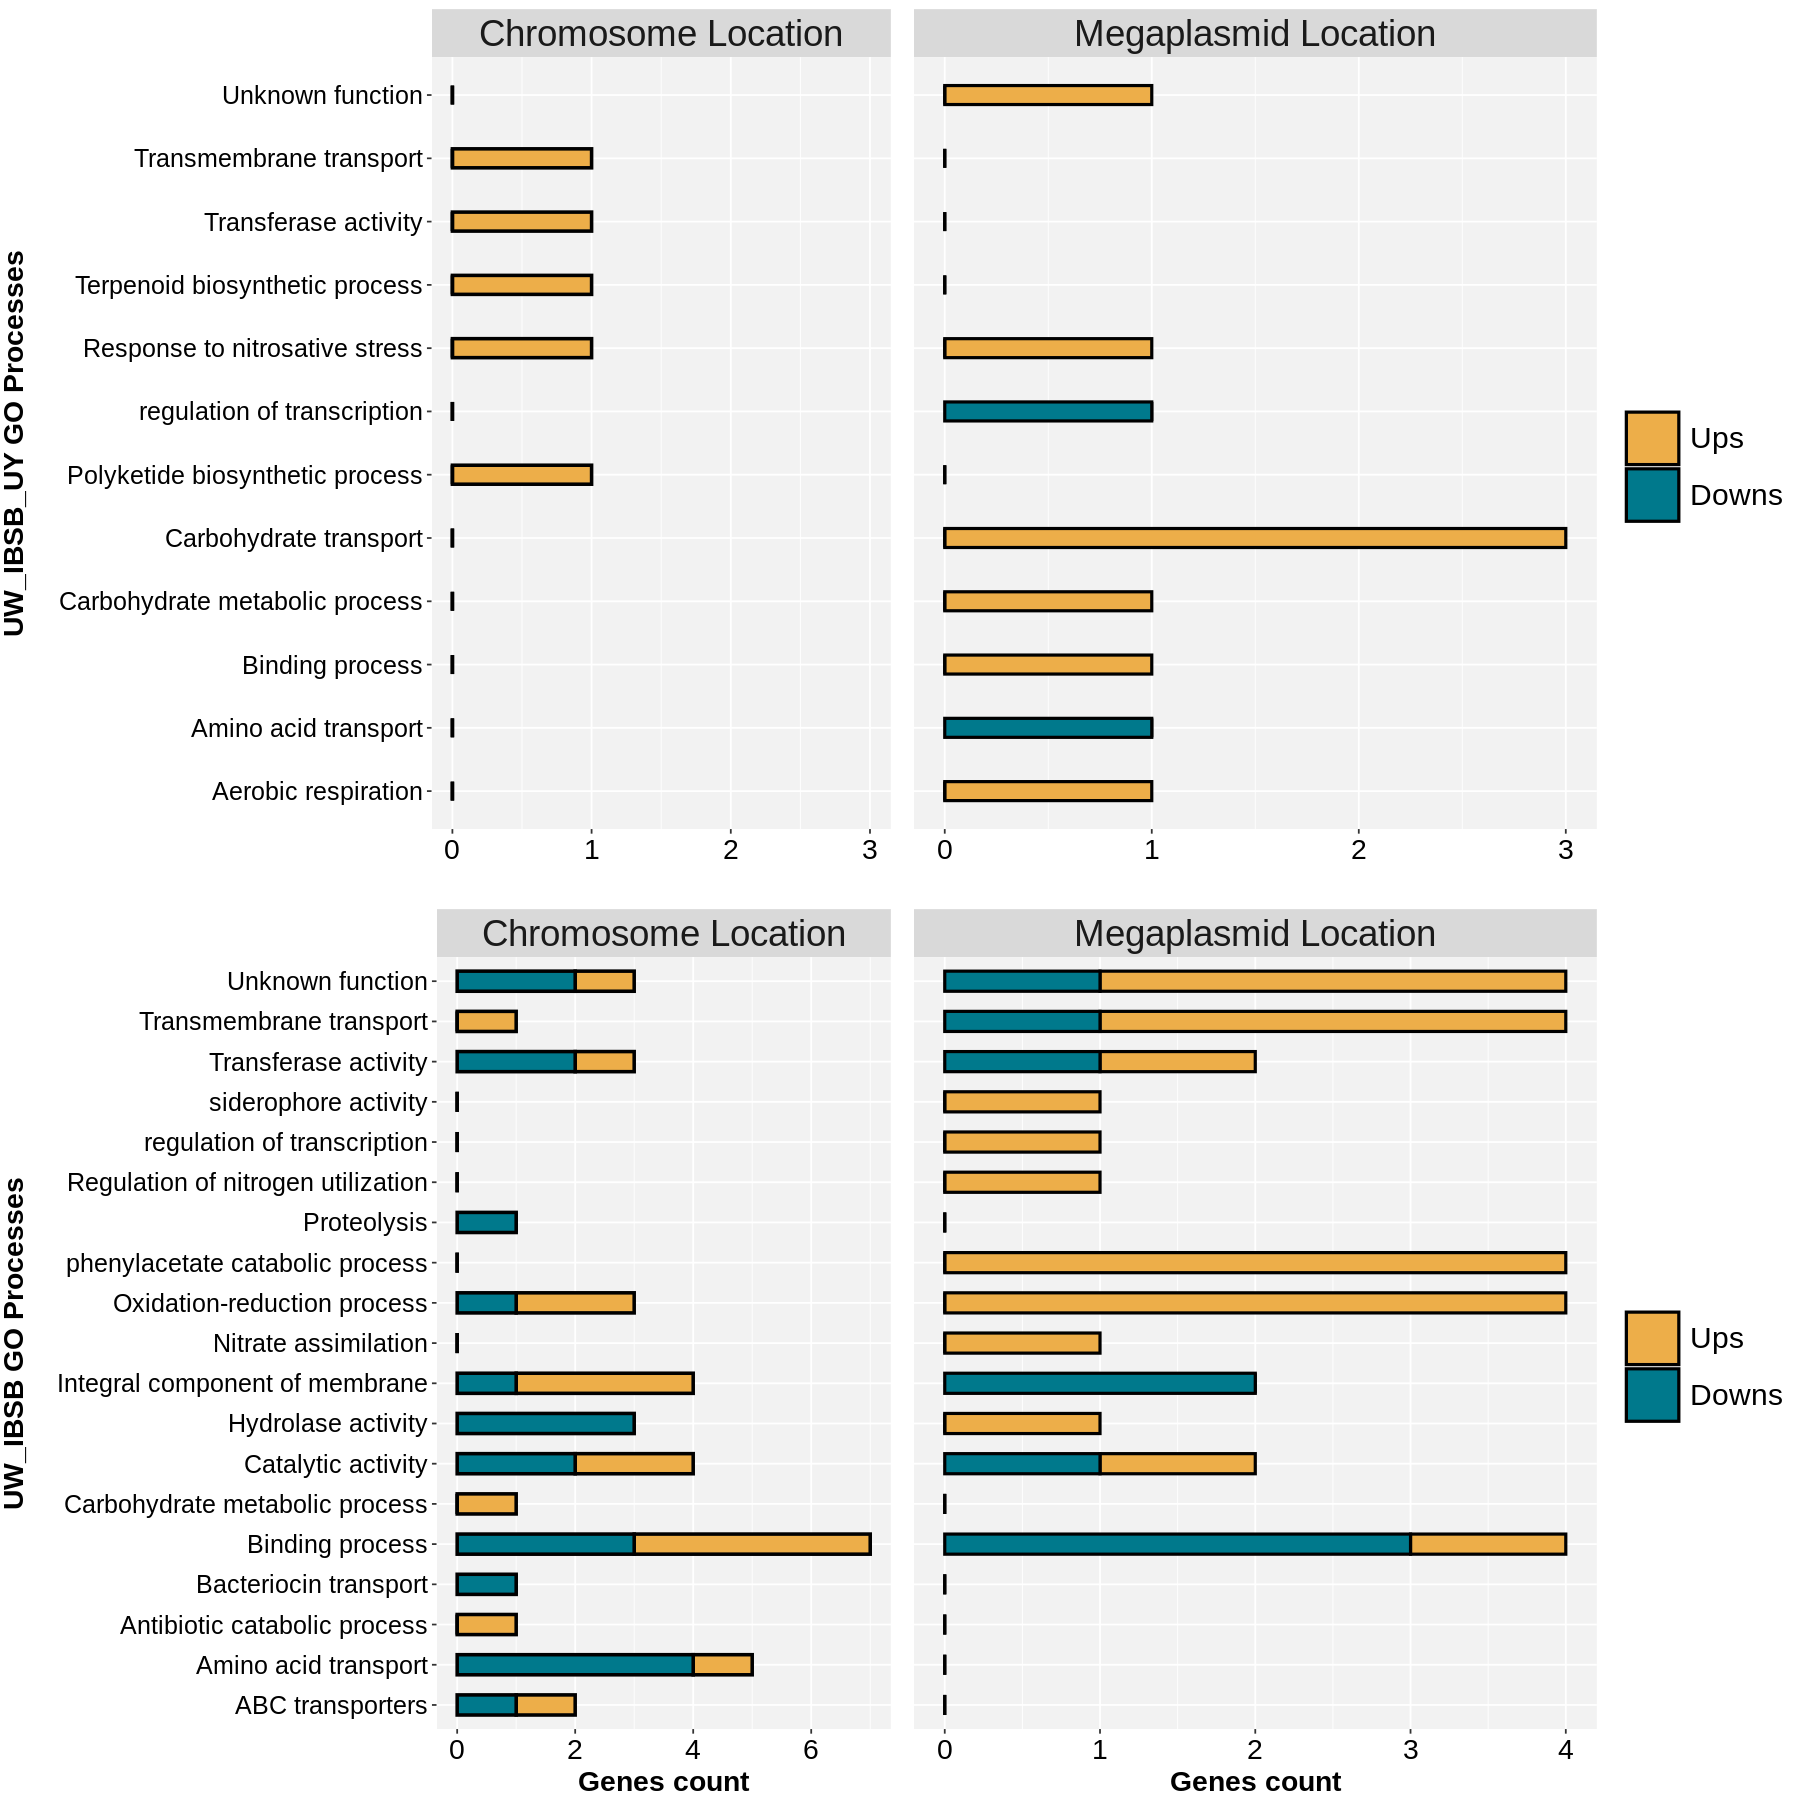

In [12]:
### ---------------------------------------------------------#
#-----------------Display Barplot altogether-----------------#
#------------------------------------------------------------#
#tiff(file="Barplot.tiff", width=15, height=15, units="in", res=300)
#jpeg("Barplot.jpg", width = 15, height = 15,units="in",res=300)
options( warn = -1 )
options(repr.plot.width = 15) 
options(repr.plot.height = 15) 
suppressWarnings(BarplotDEGS_Plot <- grid.arrange(Share_3_barp_genome, Share_3_barp_plasmid,
                                                  Share_2_barp_genome,Share_2_barp_plasmid,nrow = 2, ncol=2, widths = c(1/2,1/2)))

#dev.off()

### Gene Enrichment plot

In [23]:
#------------------------------------------------------------#
#-------------------------Input Data-------------------------#
#------------------------------------------------------------#

enrich<- read.delim('enrich_plot/input.txt', header=T)   
enrich<- enrich[order(enrich$Gene_ratio),]
enrich$KEGG.Term <- factor(enrich$KEGG.Term, levels=unique(enrich$KEGG.Term))
head(enrich)

,KEGG.Term,Gene_ratio,Corrected.P.Value,Input.Genes
,<fct>,<dbl>,<dbl>,<chr>
14,Biosynthesis of secondary metabolites,0.003401361,0.68871057,hisA
13,Biosynthesis of amino acids,0.007518797,0.43774793,hisA
6,Metabolic pathways,0.009090909,0.02949231,mmsB|hisA|paaA|paaB|paaC|scrB|nasA|paaD
12,Quorum sensing,0.010204082,0.37209709,livM
4,Microbial metabolism in diverse environments,0.018315018,0.01163026,paaB|paaC|nasA|paaD|paaA
3,Two-component system,0.024691358,0.01163026,pstS1|dctD1|gltK|gltJ


In [24]:
#------------------------------------------------------------#
#-------------------------Theme ggplot-----------------------#
#------------------------------------------------------------#
My_Theme = theme(
  axis.title.x = element_text(size=19, vjust=0.0005, face="bold"),
  axis.text.x = element_text(size = 16, color = "black"),
  axis.title.y =element_text(size=20, vjust=1, face="bold"),
  axis.text.y = element_text(size = 15,color = "black"),
  strip.text.x= element_text(size = 22),
  panel.background = element_rect(fill = "grey98"),
  legend.spacing.y = unit(0.8, 'cm'),
  legend.key.size = unit(1.2, "cm"),
  legend.title = element_text(size=16, face="bold"),
  legend.text = element_text(size = 20),
  #legend.title = element_blank(),
  legend.position="right")

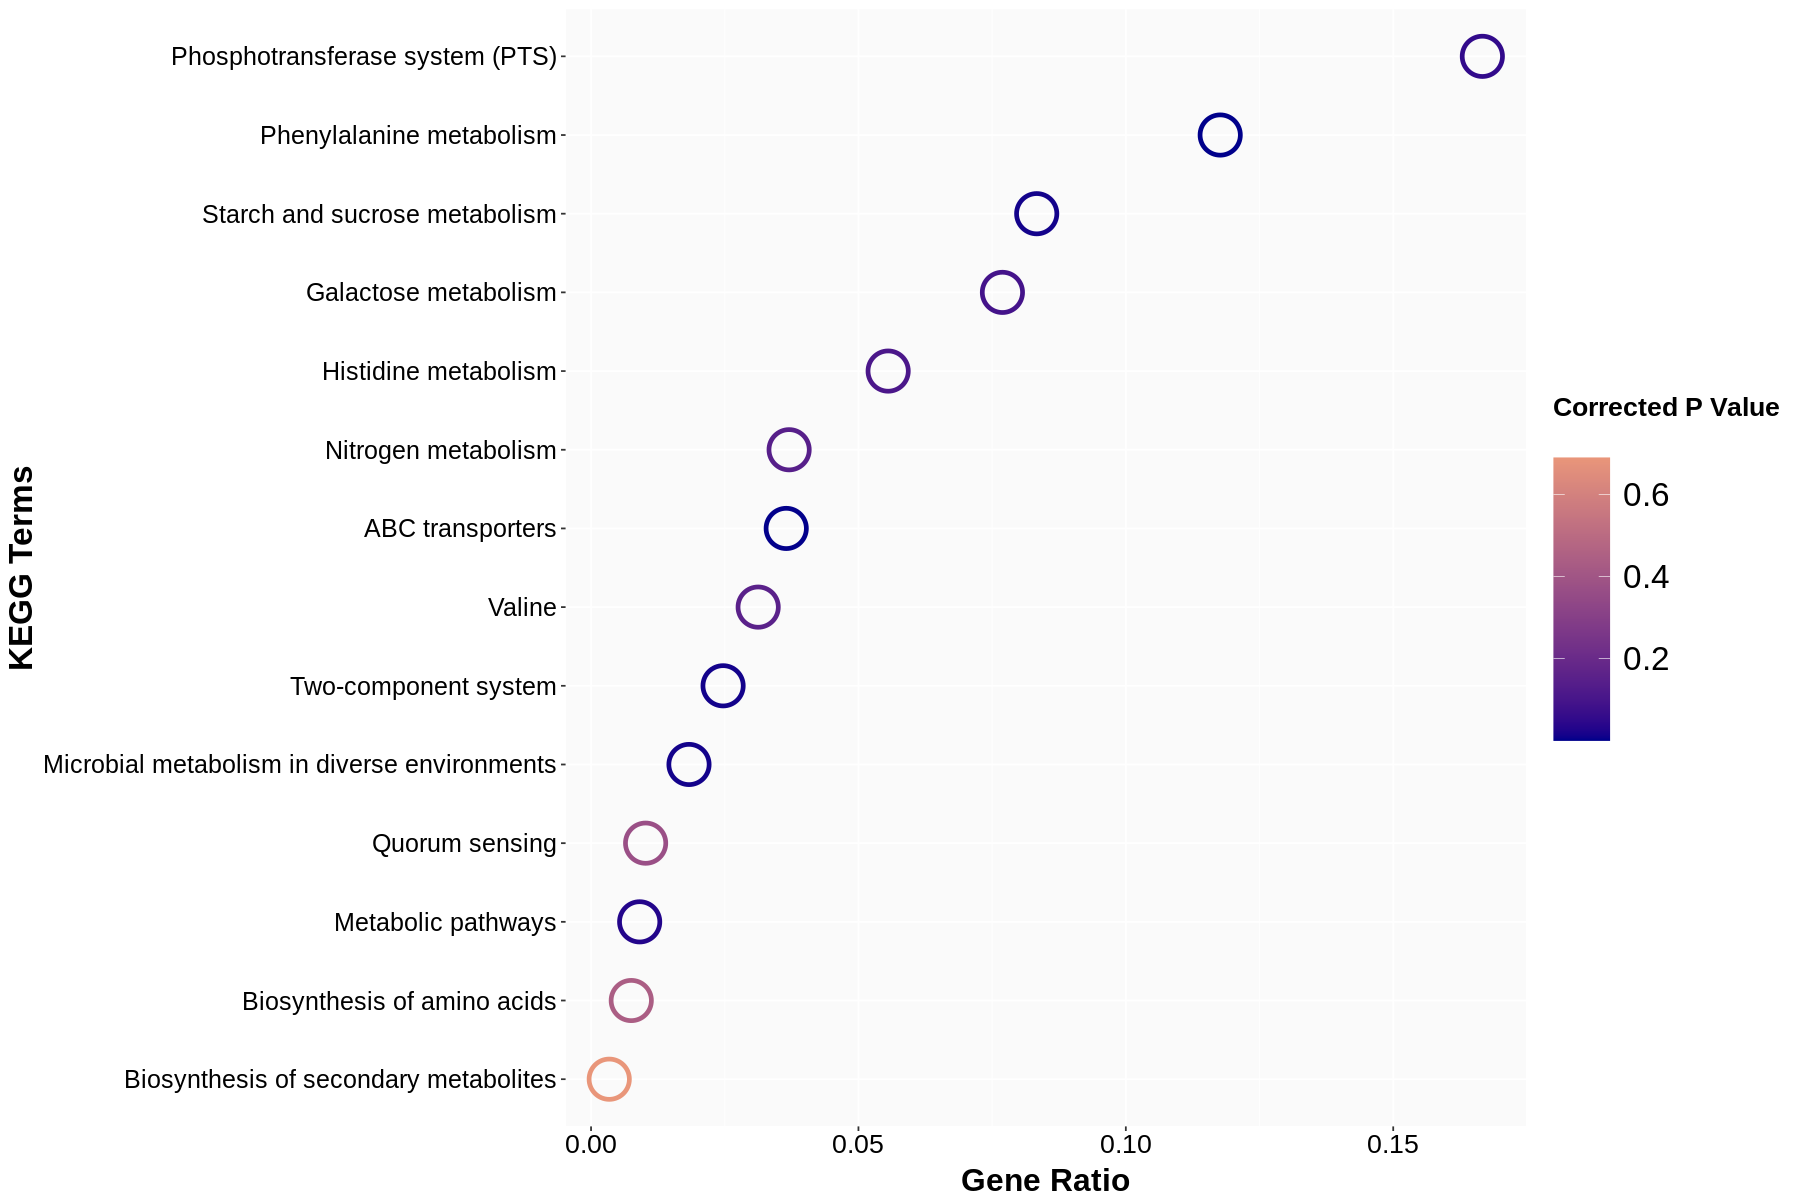

In [25]:
#------------------------------------------------------------#
#---------------------------Enrichplot-----------------------#
#------------------------------------------------------------#
options(repr.plot.width = 15)
options(repr.plot.height = 10)
#tiff(file="Enrich_plot.tiff", width=15, height=15, units="in", res=300)
#jpeg("Enrich_plot.jpg", width = 15, height = 15,units="in",res=300)
dots <- ggplot(enrich, aes(x = Gene_ratio, y = KEGG.Term, colour= Corrected.P.Value)) +
        My_Theme + geom_point(shape=21,stroke=2,size=10) + xlab("Gene Ratio") +  
        ylab("KEGG Terms")  + scale_colour_gradient(low = "darkblue", high = "darksalmon")+
        labs(color="Corrected P Value")
dots
#dev.off()

# Para descartar:


In [104]:
FE <- read.delim ("Ups_Kobas_GMI1000_Fold_Enrichment.txt", header=T)
FE_log <- -log(FE$Fold.Enrichment)
FE2 <- cbind(FE,FE_log)
FE2 <- FE2[order(FE2$FE_log),]
FE2$Function <- as.character(FE2$Function)
FE2$Function <- factor(FE2$Function, levels=unique(FE2$Function))

In [ ]:
#------------------------------------------------------------------------------------#
#-------------------------Shared Analysis--------------------------------------------#
#------------------------------------------------------------------------------------#
shared_2<-read.table('shared_UW163_IBSBF1503.txt',sep='\t',header=T)
shared_3<-read.table('shared_3_strains.txt',sep='\t',header=T)
shared_2_ups <-subset(shared_2,class=='down')
shared_2_ups <-as.character(shared_2$ID)
count_shared_2_ups<- (counts(dds_both,normalized=TRUE))[shared_2_ups, ]


shared_3_kept <-subset(shared_3,class=='down')
shared_3_kept <-as.character(shared_3_kept$ID)
count_shared_3<- (counts(dds_UY031,normalized=TRUE))[shared_3_kept, ]
View(count_shared_3)

scaling<-t(scale(t(count_shared_3)))
ups_shared_Z<-t(scale(t(count_shared_2_ups)))
df <- as.data.frame(colData(dds)[,c("condition","type")])
shared2<-as.matrix(shared[1:4])
View(shared2)

View(shared2)
pheatmap(shared2, scale='none',cluster_rows=FALSE, show_rownames=TRUE,
         cluster_cols=T)

heatmap.2(as.matrix(scaling_2),trace='none',col=magma, scale='none', Colv=T, dendrogram="column", key=TRUE, 
          margins=c(8,18), lwid = c(5,16),lhei = c(3,16), density.info = "none", labRow="",key.xlab="Z-score")

# Not taken into account

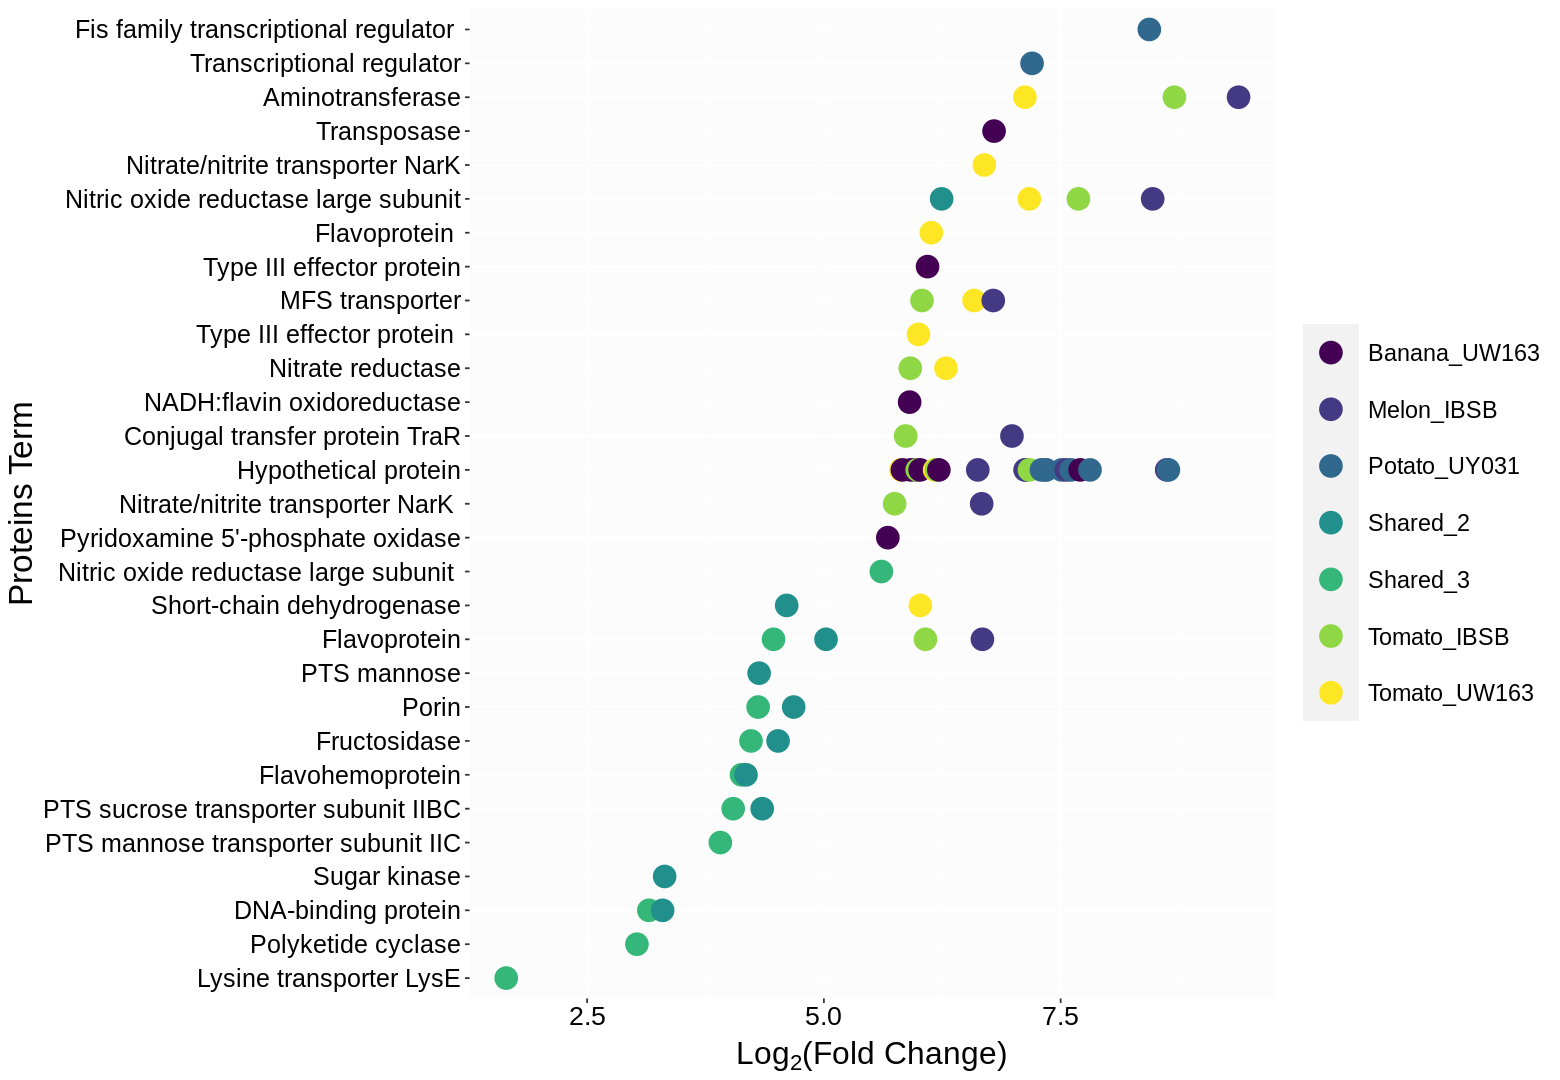

In [149]:
#------------------------------------------------------------#
#-------------------------Theme ggplot-----------------------#
#------------------------------------------------------------#
My_Theme = theme(
  axis.title.x = element_text(size=19, vjust=0.0005),
  axis.text.x = element_text(size = 16, color = "black"),
  axis.title.y =element_text(size=20, vjust=1),n
  axis.text.y = element_text(size = 15,color = "black" ),
  strip.text.x= element_text(size = 22),
  panel.background = element_rect(fill = "grey99"),
  legend.spacing.y = unit(0.8, 'cm'),
  legend.key.size = unit(1.2, "cm"),
  #legend.title = element_text(size=16, face="bold"),
  legend.text = element_text(size = 14),
  legend.title = element_blank())

#------------------------------------------------------------#
#---------------------------Dotplot--------------------------#
#------------------------------------------------------------#
options(repr.plot.width = 13)
options(repr.plot.height = 9)
dots <- ggplot(GO_matrix, aes(x =log2FoldChange, y = proteins, colour = Host)) +
        My_Theme + xlab(expression(paste(Log[2],"(Fold Change)"))) +  ylab("Proteins Term") +
        scale_size(range =  c(3,8)) + guides(size = FALSE) +
             geom_point(alpha = 1, size = 6) +
     scale_color_viridis_d(option = "viridis" )
        
dots
 